<a href="https://colab.research.google.com/github/raissadhrmswr/Project/blob/main/OPS_2739_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: Python for Project Scheduling 2739
#### INSTRUCTOR: Luis Fernando Pérez Armas

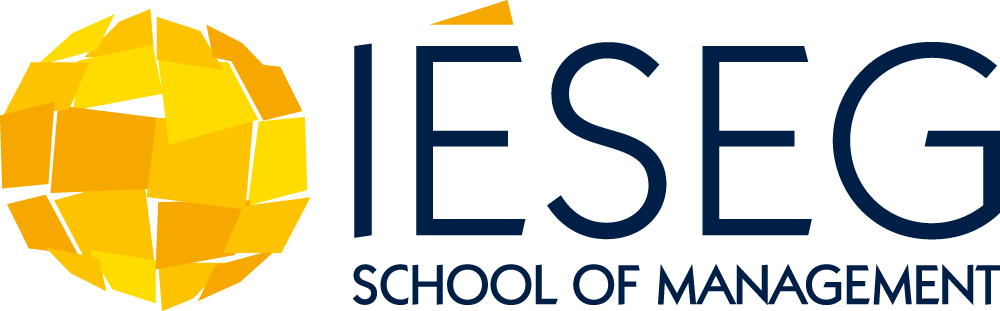

**1) Text cell with the name and last name of each one of the team members.**

ALVARADO Miranda

DHARMESWARI Raissa

TAN Gian Patrick

**2) Input the project data in Python and store it into the appropriate data structure.**

In [ ]:
!apt install libgraphviz-dev # libraries required for graphs visualisation in python
!pip install pygraphviz # libraries required for graphs visualisation in python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 24 not upgraded.
Need to get 2,148 kB of archives.
After this operation, 7,427 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-common all 2.24.32-4ubuntu4 [126 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-0 amd64 2.24.32-4ubuntu4 [1,791 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libgail18 amd64 2.24.32-4ubuntu4 [14.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/main amd64 libgail-common amd64 2.24.32-4ub

In [ ]:
# Import all the needed libaries, modules, etc., for the course project.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pygraphviz as pgv
from IPython.display import SVG
import random

# Data input

The function belows, allows you to input the project data into your python session, and transforms the excel data into a python dictionary with the format that we worked in class.

In [ ]:
def import_project_excel_data(filename='final_project_data.xlsx',project_data_sheet_name = 'data_project', max_res_data_sheet_name = 'max_resources'):
  # Note that the Excel file (in .xlsx format) has already been uploaded onto the Google Colab platform.
  df = pd.read_excel(filename,index_col=0,sheet_name=project_data_sheet_name)
  df.index = df.index.astype("str")
  PROJECT = df.T.to_dict()
  for a in PROJECT:
    b = PROJECT[a]['precedence'].split(',') # split method creates a list using the comma as a point for division of the text
    PROJECT[a]['precedence'] = b # we substitute the text in the precedence by the list we just created

  PROJECT['Start']['precedence'] = [None]

  MR = pd.read_excel(filename,index_col=0,sheet_name=max_res_data_sheet_name)
  max_resources = MR.to_dict()['c']

  return PROJECT, max_resources

The function outputs a PROJECT dictionary, as well as a dictionary for the maximun resources

In [ ]:
PROJECT, max_resources = import_project_excel_data('final_project_data.xlsx')

In [ ]:
pd.DataFrame(PROJECT).T # The data structure of our project data is stored in a Pandas dataframe.

,duration,precedence,resource_A,resource_B
Start,0,[None],0,0
2,7,[Start],10,9
3,7,[Start],1,11
4,8,[Start],0,17
5,9,[Start],10,1
6,8,[Start],6,8
7,5,[Start],2,5
8,1,[Start],7,5
9,10,[Start],8,3
10,1,[Start],8,8


In [ ]:
max_resources

{'resource_A': 20, 'resource_B': 24}

# Network graph

**3) Create a 'Graph' or network plot of your project data.**

In [ ]:
def create_network_diagram(PROJECT):
  EDGES = []
  for node in PROJECT:
    for prec in PROJECT[node]['precedence']:
      if prec == None or prec == 'None':
        continue
      #edge = (node,prec)
      edge = (prec,node)
      EDGES.append(edge)

  PROJECT_NETWORK = pgv.AGraph(directed=True,rankdir="LR")
  for edge in EDGES:
      PROJECT_NETWORK.add_edge(edge)

  PROJECT_NETWORK.layout(prog='dot') # Optional prog=['neato'|'dot'|'twopi'|'circo'|'fdp'|'nop']

  PROJECT_NETWORK.draw("PROJECT_NETWORK.svg",)
  #SVG("PROJECT_NETWORK.svg")


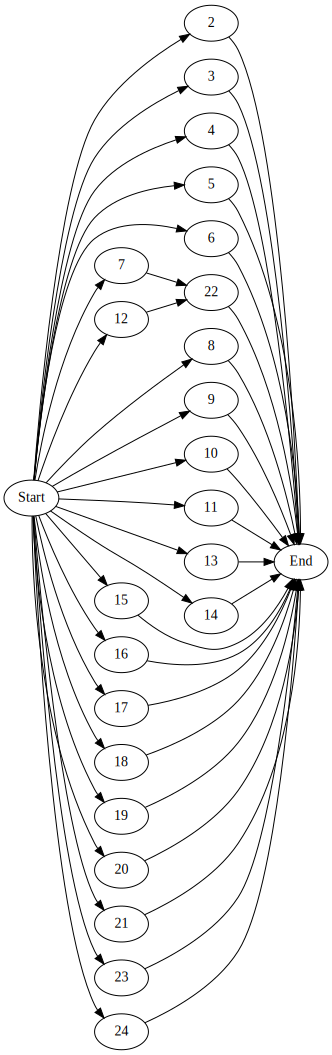

In [ ]:
create_network_diagram(PROJECT)
SVG("PROJECT_NETWORK.svg")

In [ ]:
EDGES = []
for node in PROJECT:
  for prec in PROJECT[node]['precedence']:
    if prec == None or prec == 'None':
      continue
    #edge = (node,prec)
    edge = (prec,node)
    EDGES.append(edge)

# CPM

**4) Apply the critical path method to the project data and produce the CPM Schedule.**

In [ ]:
def CPM(PROJECT): # Function that takes project input data and produces a CPM schedule

  CPM_SCHEDULE = dict()

  for task in PROJECT:
    CPM_SCHEDULE[task] = {'ES':0,'EF':0,'LS':0,'LF':0,'F':0,'D':PROJECT[task]['duration']}
    prec_constraints = PROJECT[task]['precedence']
    if prec_constraints[0] == None or prec_constraints[0] =='None':
      continue
    #print(prec_constraints)
    starts = []
    for act in prec_constraints:
      starts.append(CPM_SCHEDULE[act]['EF'])
    CPM_SCHEDULE[task]['ES'] = max(starts)
    CPM_SCHEDULE[task]['EF'] = CPM_SCHEDULE[task]['ES'] + PROJECT[task]['duration']
    if task == 'End':
      CPM_SCHEDULE[task]['LS'] = CPM_SCHEDULE[task]['ES']
      CPM_SCHEDULE[task]['LF'] = CPM_SCHEDULE[task]['EF']


  for task in list(PROJECT.keys())[::-1]: # for each activity in the project but going from the end up to the start
    prec_constraints = PROJECT[task]['precedence'] # get the precedence constraints
    if prec_constraints[0] == None or prec_constraints[0] =='None': # if the precedence constraint is none it means that the activity is the start
      continue
    for act in prec_constraints: # for each activity in the precedence constraint
      if CPM_SCHEDULE[act]['LF'] == 0:
        CPM_SCHEDULE[act]['LF'] = CPM_SCHEDULE[task]['LS'] # the late finish of the precedence c activitis equal to the start of the activity they precede
        CPM_SCHEDULE[act]['LS'] = CPM_SCHEDULE[act]['LF'] - PROJECT[act]['duration'] # the late start is equal to late finish minus the duration
      else:
        if CPM_SCHEDULE[task]['LS'] >= CPM_SCHEDULE[act]['LF']:
          continue
        else:
          CPM_SCHEDULE[act]['LF'] = CPM_SCHEDULE[task]['LS']
          CPM_SCHEDULE[act]['LS'] = CPM_SCHEDULE[act]['LF'] - PROJECT[act]['duration']
    CPM_SCHEDULE[task]['F'] = CPM_SCHEDULE[task]['LF'] - CPM_SCHEDULE[task]['EF'] # calculate the float



  return CPM_SCHEDULE

In [ ]:
CPM_SCHEDULE = CPM(PROJECT)
CPM_SCHEDULE

{'Start': {'ES': 0, 'EF': 0, 'LS': 4, 'LF': 4, 'F': 0, 'D': 0},
 '2': {'ES': 0, 'EF': 7, 'LS': 6, 'LF': 13, 'F': 6, 'D': 7},
 '3': {'ES': 0, 'EF': 7, 'LS': 6, 'LF': 13, 'F': 6, 'D': 7},
 '4': {'ES': 0, 'EF': 8, 'LS': 5, 'LF': 13, 'F': 5, 'D': 8},
 '5': {'ES': 0, 'EF': 9, 'LS': 4, 'LF': 13, 'F': 4, 'D': 9},
 '6': {'ES': 0, 'EF': 8, 'LS': 5, 'LF': 13, 'F': 5, 'D': 8},
 '7': {'ES': 0, 'EF': 5, 'LS': 0, 'LF': 5, 'F': 0, 'D': 5},
 '8': {'ES': 0, 'EF': 1, 'LS': 12, 'LF': 13, 'F': 12, 'D': 1},
 '9': {'ES': 0, 'EF': 10, 'LS': 3, 'LF': 13, 'F': 3, 'D': 10},
 '10': {'ES': 0, 'EF': 1, 'LS': 12, 'LF': 13, 'F': 12, 'D': 1},
 '11': {'ES': 0, 'EF': 9, 'LS': 4, 'LF': 13, 'F': 4, 'D': 9},
 '12': {'ES': 0, 'EF': 5, 'LS': 0, 'LF': 5, 'F': 0, 'D': 5},
 '13': {'ES': 0, 'EF': 9, 'LS': 4, 'LF': 13, 'F': 4, 'D': 9},
 '14': {'ES': 0, 'EF': 9, 'LS': 4, 'LF': 13, 'F': 4, 'D': 9},
 '15': {'ES': 0, 'EF': 9, 'LS': 4, 'LF': 13, 'F': 4, 'D': 9},
 '16': {'ES': 0, 'EF': 5, 'LS': 8, 'LF': 13, 'F': 8, 'D': 5},
 '17': {'E

In [ ]:
pd.DataFrame(CPM_SCHEDULE).T # CPM schedule on a Pandas dataframe.

,ES,EF,LS,LF,F,D
Start,0,0,4,4,0,0
2,0,7,6,13,6,7
3,0,7,6,13,6,7
4,0,8,5,13,5,8
5,0,9,4,13,4,9
6,0,8,5,13,5,8
7,0,5,0,5,0,5
8,0,1,12,13,12,1
9,0,10,3,13,3,10
10,0,1,12,13,12,1


In [ ]:
def extended_CPM(PROJECT):

  CPM_SCHEDULE = dict()

  for task in PROJECT:
    CPM_SCHEDULE[task] = {'ES':0,'EF':0,'LS':0,'LF':0,'F':0,'D':PROJECT[task]['duration'],'IS':None,'TS':None,'NUM_IS':0,'NUM_TS':0}
    prec_constraints = PROJECT[task]['precedence']
    if prec_constraints[0] == None or prec_constraints[0] =='None':
      continue
    #print(prec_constraints)
    starts = []
    for act in prec_constraints:
      starts.append(CPM_SCHEDULE[act]['EF'])
    CPM_SCHEDULE[task]['ES'] = max(starts)
    CPM_SCHEDULE[task]['EF'] = CPM_SCHEDULE[task]['ES'] + PROJECT[task]['duration']
    if task == 'End':
      CPM_SCHEDULE[task]['LS'] = CPM_SCHEDULE[task]['ES']
      CPM_SCHEDULE[task]['LF'] = CPM_SCHEDULE[task]['EF']


  for task in list(PROJECT.keys())[::-1]: # for each activity in the project but going from the end up to the start
    prec_constraints = PROJECT[task]['precedence'] # get the precedence constraints
    if prec_constraints[0] == None or prec_constraints[0] =='None': # if the precedence constraint is none it means that the activity is the start
      continue
    for act in prec_constraints: # for each activity in the precedence constraint
      if CPM_SCHEDULE[act]['LF'] == 0:
        CPM_SCHEDULE[act]['LF'] = CPM_SCHEDULE[task]['LS'] # the late finish of the precedence c activitis equal to the start of the activity they precede
        CPM_SCHEDULE[act]['LS'] = CPM_SCHEDULE[act]['LF'] - PROJECT[act]['duration'] # the late start is equal to late finish minus the duration
      else:
        if CPM_SCHEDULE[task]['LS'] >= CPM_SCHEDULE[act]['LF']:
          continue
        else:
          CPM_SCHEDULE[act]['LF'] = CPM_SCHEDULE[task]['LS']
          CPM_SCHEDULE[act]['LS'] = CPM_SCHEDULE[act]['LF'] - PROJECT[act]['duration']
    CPM_SCHEDULE[task]['F'] = CPM_SCHEDULE[task]['LF'] - CPM_SCHEDULE[task]['EF'] # calculate the float

  EDGES = []
  for node in PROJECT: # mapping out the arrows
    for prec in PROJECT[node]['precedence']:
      if prec == None:
        continue

      edge = (prec,node) # Create a tupple of the precedence and the node
      EDGES.append(edge)


  SUCCESORS = {act:[] for act in PROJECT}
  for n1,n2 in EDGES: # For all collections of node 1 and node 2 (tupple)
    if n2 != 'End': # If I am not at the end
      SUCCESORS[n1].append(n2) # I want to append node 2 to the list associated with node 1.

  INMEDIATE_SUCCESORS = dict()
  for activity in PROJECT:
    INMEDIATE_SUCCESORS[activity] = len(SUCCESORS[activity]) # Calculate how many immediate successors does each have

  DURATION_SUCCESORS = {act:[] for act in PROJECT}
  for n1,n2 in EDGES:
    DURATION_SUCCESORS[n1].append(PROJECT[n2]['duration'])

  TOTAL_SUCCESORS = {'End':[]}
  for task in list(PROJECT.keys())[::-1]:
    succesor = SUCCESORS[task]
    for act in  succesor:
      succesor = succesor + TOTAL_SUCCESORS[act]
    TOTAL_SUCCESORS[task] = succesor

  MOST_TOTAL_SUCCESSORS = dict()
  for activity in PROJECT:
    MOST_TOTAL_SUCCESSORS[activity] = len(set(TOTAL_SUCCESORS[activity]))

  for task in CPM_SCHEDULE:

    CPM_SCHEDULE[task]['IS'] = SUCCESORS[task]
    CPM_SCHEDULE[task]['D_IS'] = DURATION_SUCCESORS[task]
    CPM_SCHEDULE[task]['SUM_D_IS'] = sum(DURATION_SUCCESORS[task])
    CPM_SCHEDULE[task]['GRPW'] = CPM_SCHEDULE[task]['SUM_D_IS'] + CPM_SCHEDULE[task]['D']
    CPM_SCHEDULE[task]['TS'] = list(set(TOTAL_SUCCESORS[task]))
    CPM_SCHEDULE[task]['NUM_IS'] = INMEDIATE_SUCCESORS[task]
    CPM_SCHEDULE[task]['NUM_TS'] = MOST_TOTAL_SUCCESSORS[task]

  return CPM_SCHEDULE

In [ ]:
extended_CPM_SCHEDULE = extended_CPM(PROJECT)

In [ ]:
pd.DataFrame(extended_CPM_SCHEDULE).T # Extended CPM schedule on a Pandas dataframe.

,ES,EF,LS,LF,F,D,IS,TS,NUM_IS,NUM_TS,D_IS,SUM_D_IS,GRPW
Start,0,0,4,4,0,0,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[18, 22, 16, 15, 20, 17, 8, 11, 4, 23, 24, 7, ...",22,23,"[7, 7, 8, 9, 8, 5, 1, 10, 1, 9, 5, 9, 9, 9, 5,...",147,147
2,0,7,6,13,6,7,[],[],0,0,[0],0,7
3,0,7,6,13,6,7,[],[],0,0,[0],0,7
4,0,8,5,13,5,8,[],[],0,0,[0],0,8
5,0,9,4,13,4,9,[],[],0,0,[0],0,9
6,0,8,5,13,5,8,[],[],0,0,[0],0,8
7,0,5,0,5,0,5,[22],[22],1,1,[8],8,13
8,0,1,12,13,12,1,[],[],0,0,[0],0,1
9,0,10,3,13,3,10,[],[],0,0,[0],0,10
10,0,1,12,13,12,1,[],[],0,0,[0],0,1


In [ ]:
def CP(CPM_SCHEDULE): # function that return the critical activities from the CPM Schedule
  CP = []
  for activity in CPM_SCHEDULE:
    if CPM_SCHEDULE[activity]['F']==0:
      CP.append(activity)
  return CP

In [ ]:
CP(extended_CPM_SCHEDULE)

['Start', '7', '12', '22', 'End']

# CPM Gantt

**5) Create a Gantt chart of the CPM schedule.**

In [ ]:
def CPM_Gantt(CPM_SCHEDULE,early=True,save=False,name = 'Project_Schedule.jpg'):

  y_start = len(CPM_SCHEDULE) - 1

  ticks = [y_start - i+0.375 for i in range(1,y_start)][::-1]

  labels = [x for x in CPM_SCHEDULE if x not in ['Start','End']]

  plt.figure(figsize=(20,15))

  title = 'EARLY' if early else 'LATE'

  for i,activity in enumerate(CPM_SCHEDULE):

    if activity in ['Start','End']:
      continue

    if early:

      plt.broken_barh([(CPM_SCHEDULE[activity]['ES'],CPM_SCHEDULE[activity]['D'])],
                      (y_start-i, 0.75),
                      alpha=0.5,color='red' if CPM_SCHEDULE[activity]['F'] == 0 else 'blue',edgecolor='black')
      plt.text(CPM_SCHEDULE[activity]['ES'] + 0.1,
               y_start-i+0.25,
               f'Activity {activity}',fontsize=12)

    else:
      plt.broken_barh([(CPM_SCHEDULE[activity]['LS'],CPM_SCHEDULE[activity]['D'])],
                    (y_start-i, 0.75),
                    alpha=0.5,color='red' if CPM_SCHEDULE[activity]['F'] == 0 else 'purple' ,edgecolor='black')
      plt.text(CPM_SCHEDULE[activity]['LS'] + 0.1,
              y_start-i+0.25,
              f'Activity {activity}',fontsize=12)


  plt.title(f'Project Schedule ({title})', fontsize=12)
  plt.xlabel('Days')
  plt.ylabel('Activities')
  plt.xticks(list(range(CPM_SCHEDULE['End']['LS']+2)),fontsize=12)
  plt.yticks(ticks=ticks,
        labels=labels[::-1], fontsize=12)
  plt.grid()
  if save:
    plt.savefig(name)

  plt.show()


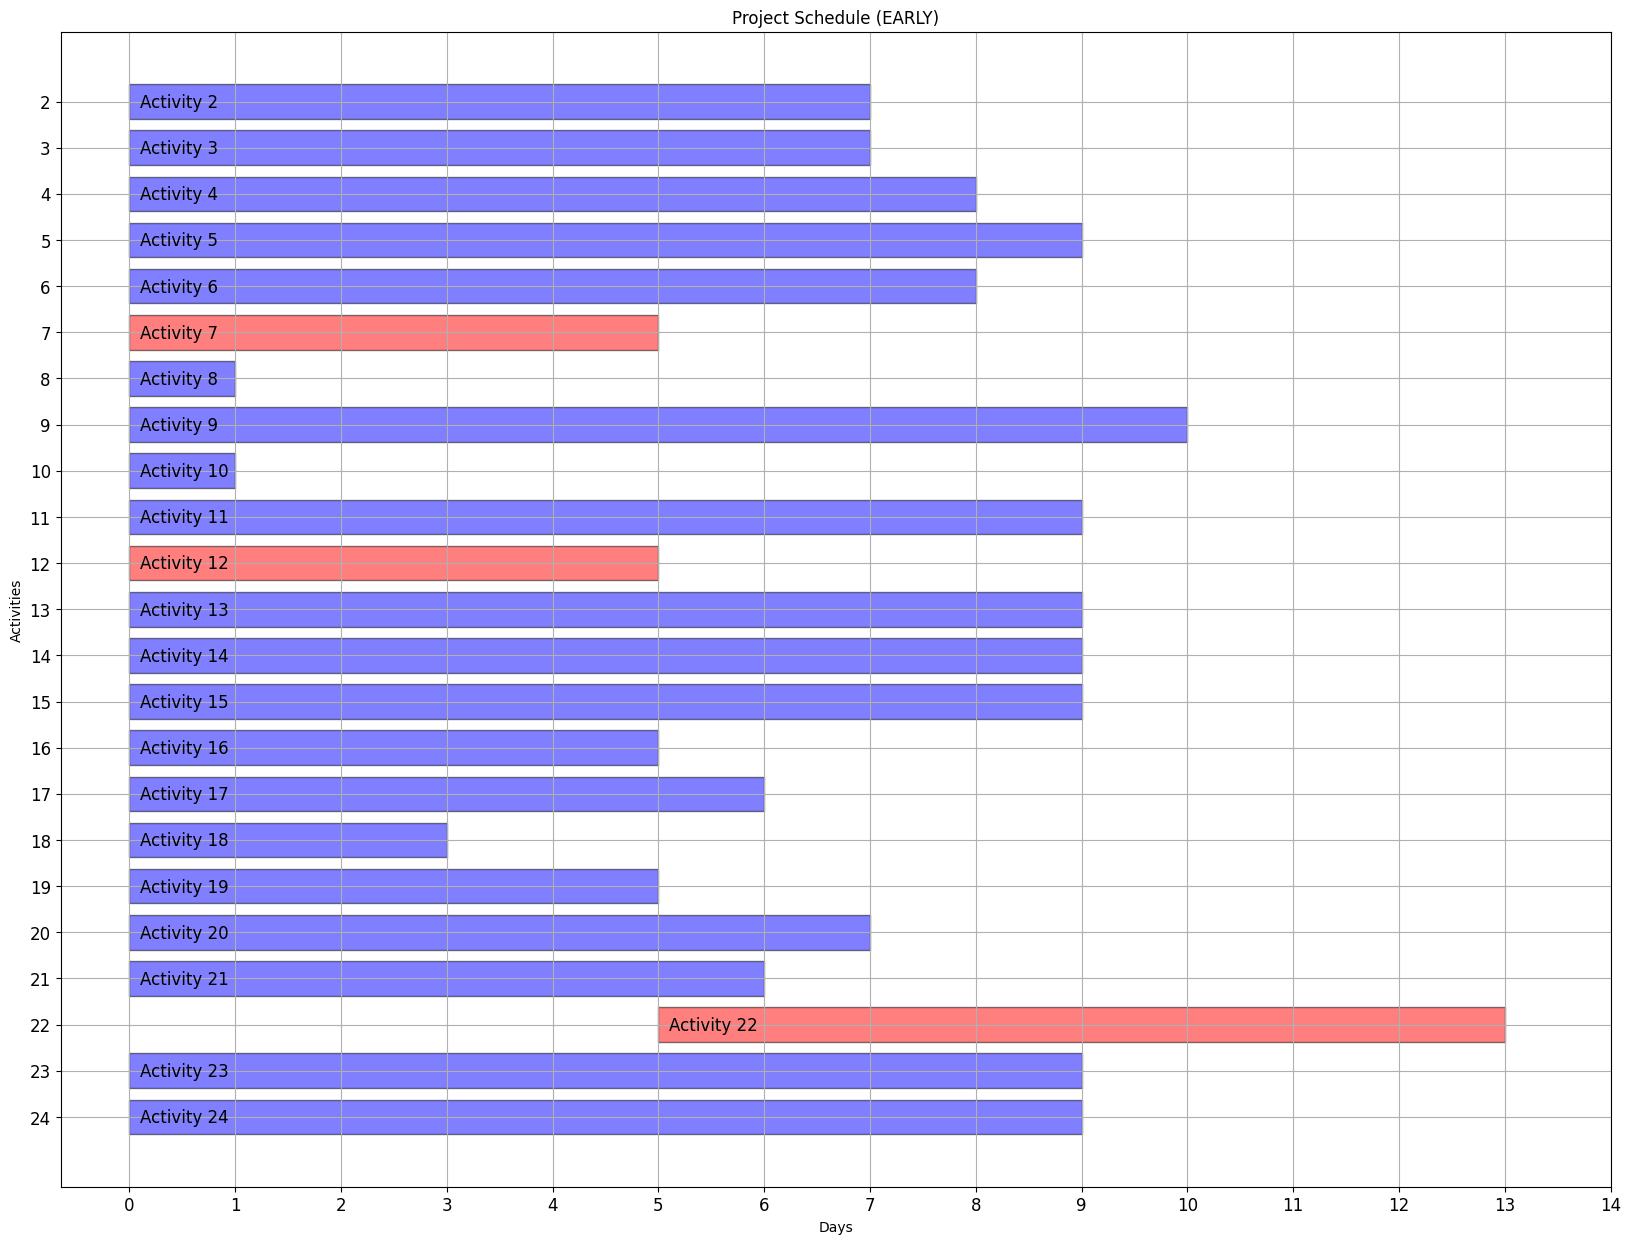

In [ ]:
CPM_Gantt(extended_CPM_SCHEDULE,True,save = True) # Gantt Chart of CPM schedule

In [ ]:
def range_overlap(range1, range2): # Checks if two dates overlap (project scheduling)
  """Whether range1 and range2 overlap."""
  x1, x2 = range1.start, range1.stop
  y1, y2 = range2.start, range2.stop
  #print((x1,x2),(y1,y2))
  return x1 < y2 and y1 < x2

In [ ]:
def resource_level_per_day_CPM(PROJECT,CPM_SCHEDULE,max_resources):

  max_resources_list = [max_resources[x] for x in max_resources]
  PH_CPM = CPM_SCHEDULE['End']['EF']
  Resource_Level = {x:[0]*PH_CPM for x in max_resources}

  for day in range(PH_CPM):
    day_resources = {x:0 for x in max_resources}
    r1 = range(day,day+1)
    for activity in CPM_SCHEDULE:
      r2 = range(CPM_SCHEDULE[activity]['ES'],CPM_SCHEDULE[activity]['EF'])
      if range_overlap(r1, r2):
        for res in day_resources:
          day_resources[res]+=PROJECT[activity][res]
    for res in Resource_Level:
      Resource_Level[res][day] = day_resources[res]

  return Resource_Level

In [ ]:
resource_level_per_day_CPM(PROJECT,CPM_SCHEDULE,max_resources)

{'resource_A': [115, 100, 100, 83, 83, 80, 68, 54, 48, 17, 9, 9, 9],
 'resource_B': [122, 109, 109, 107, 107, 94, 87, 64, 39, 4, 1, 1, 1]}

In [ ]:
def resource_level_plot_cpm(PROJECT,CPM_SCHEDULE,max_resources):
  max_resources_list = [max_resources[x] for x in max_resources]
  colors = ['green', 'darkorange', 'purple', 'red', 'black', 'yellow','blue','brown','pink']*2

  PH_CPM = CPM_SCHEDULE['End']['EF']

  Resource_Level = resource_level_per_day_CPM(PROJECT,CPM_SCHEDULE,max_resources)

  title = 'Resource Level Plot CPM Schedule'
  figure, axis = plt.subplots(len(max_resources_list), 1,figsize=(20, 20))

  for i,(res,lista) in enumerate(Resource_Level.items()):
    y_lim = max(lista)+5
    for day in range(len(lista)):
      axis[i].broken_barh([(day,1)],(0,lista[day]),facecolors=colors[i])
      axis[i].text(day+0.1,lista[day]+1.25,f'{lista[day]}')
    axis[i].set_title(f'{res}')
    axis[i].axhline(y=max_resources_list[i], color = 'red',linestyle= 'dashed',lw=4)
    axis[i].set_xticks(range(PH_CPM+1))
    axis[i].set_ylim(0,y_lim)
    axis[i].grid(True)

  figure.suptitle(title,fontsize=16)
  figure.tight_layout()
  figure.subplots_adjust(top=0.95)
  plt.savefig(f'{title}.jpg')
  plt.show()

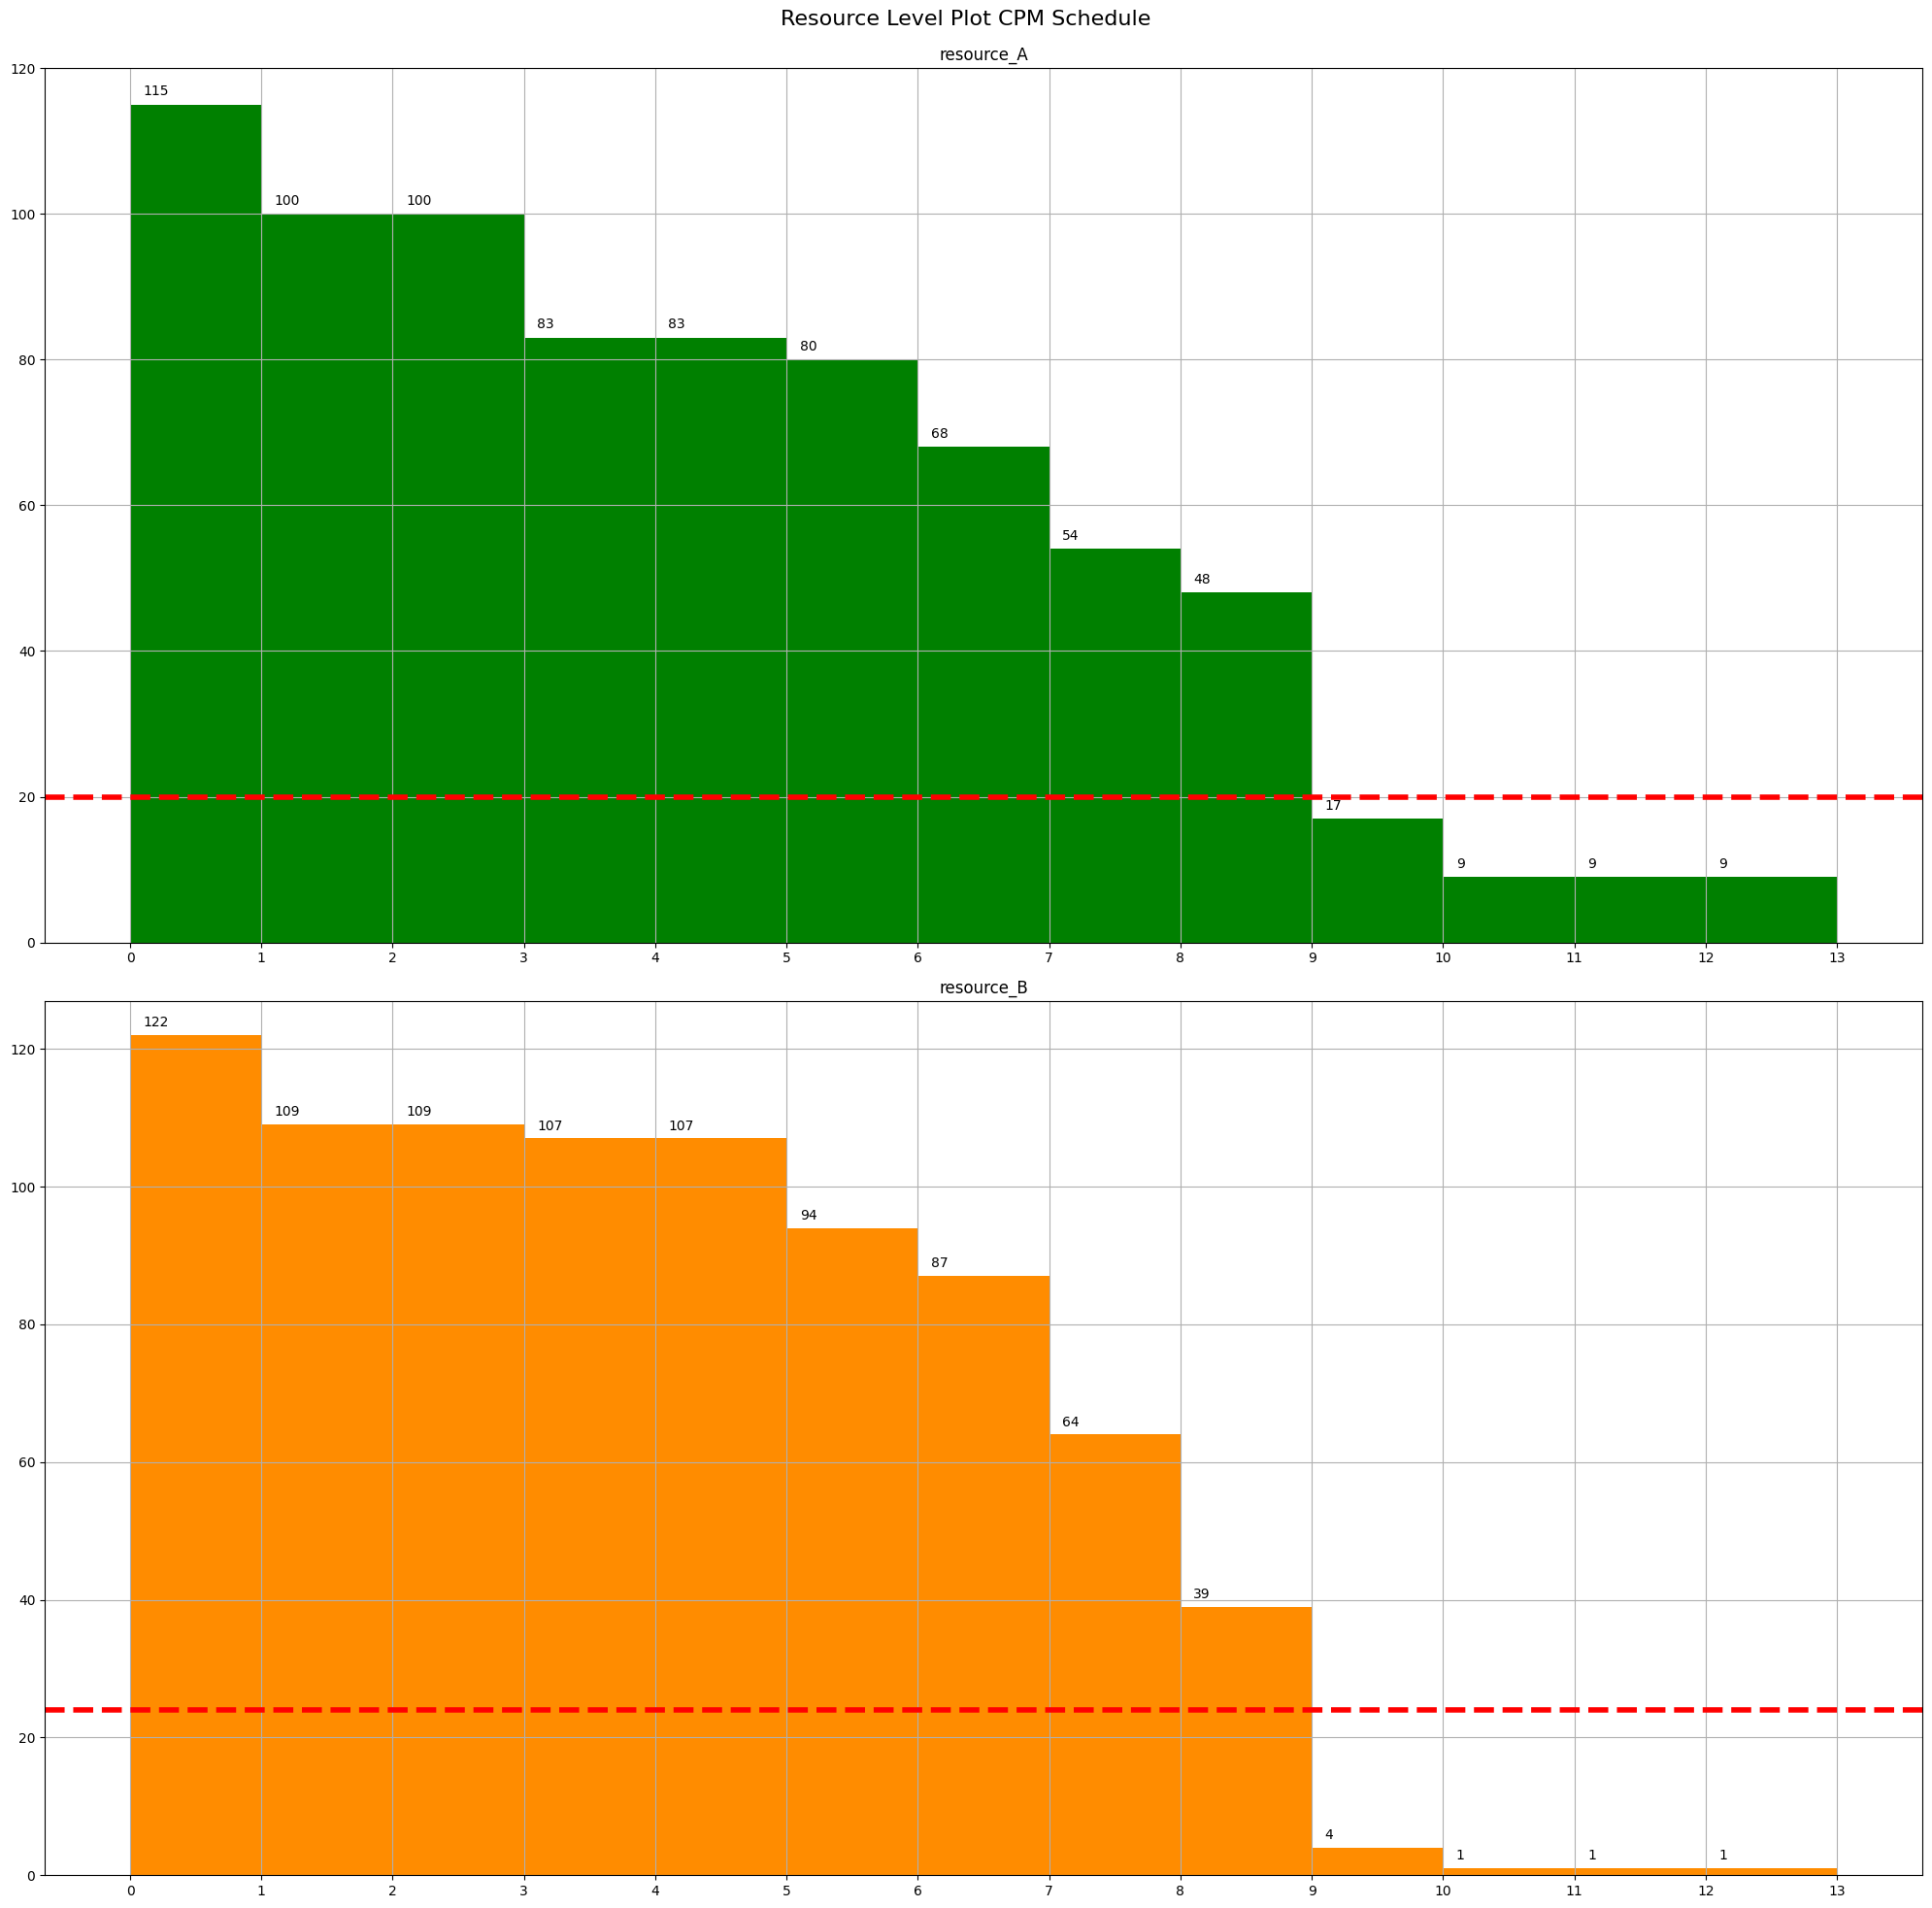

In [ ]:
resource_level_plot_cpm(PROJECT,CPM_SCHEDULE,max_resources)

In [ ]:
pd.DataFrame(PROJECT).T['duration'].sum()

155

# Heuristics


**6) Generate 8 different priority list heuristics (from the ones discussed in class) and produce a schedule from the heuristics using the PSG (Parallel method) or SSG (Serial method).**

##Prority List 1.1: Shortest Processing Time (SPT)

In [ ]:
# Priority List
PL = ['Start']
unfinished_jobs = [x for x in PROJECT if x not in ['Start','End']] # Activity that is not 'Start' and not 'End'.
while len(unfinished_jobs) > 0:
  to_sche = dict()
  print(f'Current Priority List = {PL}')
  for task in unfinished_jobs: # For each activity in my activity list
    print(f'Current Evaluation of activity ({task})')
    print(f'  Checking if precedence activities of activity ({task}) are in the priority list')
    #check if the precedent activities are already in the list
    prec_constraints = PROJECT[task]['precedence']
    print(f'  Precedence activities of ({task}) = {prec_constraints}')
    valid = 0

    for act in  prec_constraints:
      if act in PL:
        valid += 1
    if valid == len(prec_constraints): # if the activity can be scheduled based on the precedence
      print(f'  SUCCES: Activity ({task}) is a potential activitiy all its precedents are in the current priority list')
      to_sche[task] = extended_CPM_SCHEDULE[task]['D'] #then add its duration to the dictionary of potential activities
      # If you have a different priority list, you need to change 'D' to another element.
      # For the assignment, change 'D' to 'NUM_TS' (number of total successors).
      continue
    else:
      print(f'  FAIL: Activity ({task}) cannot be added to the PL, its precedents are NOT in the current priority list')
  to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[1],reverse=True)} # order the dictionary from small to large durations (last element has the shortest duration)
  # Only change the reverse to True or False


  if len(to_sche) > 1:

    if list(to_sche.values())[-1] == list(to_sche.values())[-2]: # in case there is a tie
      current_val = list(to_sche.values())[-1] # get the potential activities with the largest values
      to_sche = {k: v for k, v in to_sche.items() if v >= current_val} # get the potential activities with the largest values
      to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[0],reverse=True)} # order the activities based on their name
  print(f'potential activities to add to the priority list {to_sche}')
  a = to_sche.popitem() #remove the activity in the first element
  print(f'Activity {a} added to the priority list')
  print('-'*150)
  PL.append(a[0])
  unfinished_jobs.remove(a[0])

PL.append('End')
PL

Current Priority List = ['Start']
Current Evaluation of activity (2)
  Checking if precedence activities of activity (2) are in the priority list
  Precedence activities of (2) = ['Start']
  SUCCES: Activity (2) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (3)
  Checking if precedence activities of activity (3) are in the priority list
  Precedence activities of (3) = ['Start']
  SUCCES: Activity (3) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (4)
  Checking if precedence activities of activity (4) are in the priority list
  Precedence activities of (4) = ['Start']
  SUCCES: Activity (4) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (5)
  Checking if precedence activities of activity (5) are in the priority list
  Precedence activities of (5) = ['Start']
  SUCCES: Activity (5) is a potential activiti

['Start',
 '10',
 '8',
 '18',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '19',
 '7',
 '21',
 '2',
 '20',
 '3',
 '22',
 '23',
 '24',
 '4',
 '6',
 '5',
 '9',
 'End']

In [ ]:
# Serial Schedule Generation (SSG)
def SSG(PL,PROJECT,max_resources,verbose=False):

  SSG_SCHEDULE = {'Start':{'s':0,'f':0}}
  unfinished_jobs = [x for x in PL if x not in ['Start','End']]
  project_finish_date = 0
  planning_horizon = sum([PROJECT[x]['duration'] for x in PROJECT]) # Worst potential date for my schedule. Nothing should go beyond this.
  max_resources_list = [max_resources[x] for x in max_resources]

  for task in unfinished_jobs: # For each task in the priority list.

    prec_const = PROJECT[task]['precedence']
    precedence_start = [SSG_SCHEDULE[const]['s'] + PROJECT[const]['duration'] for const in prec_const] # Start + Duration
    start_preced = max(precedence_start) # Choose the maximum.
    if verbose:
      print(f'Checking if activity {task} can be scheduled as soon as its predecessors ({prec_const}) are finished on day {start_preced}')
    dur = PROJECT[task]['duration'] # Duration of current activity.
    resource_conflicting_activities = [x for x in SSG_SCHEDULE if x != task] # Activities in current schedule.
    activities_overlap = []
    if verbose:
      print(f'Checking potential resource conflicting activities being executed between the dates {(start_preced,start_preced+dur)}')
    for a in resource_conflicting_activities: # For all activities that are in potential conflict

      r1 = range(start_preced,start_preced+dur)
      r2 = range(SSG_SCHEDULE[a]['s'],SSG_SCHEDULE[a]['f']) # Start and finish of conflicting activity

      if range_overlap(r1,r2): # If this activity is overlapping
        activities_overlap.append(a) # Append to acitivities_overlap
    if verbose:
      print(f'The following activites: {activities_overlap} have a potential conflict with activity {task}')
      print(f'Checking total daily resources between the dates {((start_preced,start_preced+dur))}')
    res_per_day = []
    for day in range(start_preced,start_preced + dur+1):
      resources_per_activity = {x:PROJECT[task][x] for x in max_resources} # dictionary of all resources initialized to the value of the task in question
      for a2 in activities_overlap:

        r3 = range(day,day+1)
        r4 = range(SSG_SCHEDULE[a2]['s'],SSG_SCHEDULE[a2]['f'])
        if range_overlap(r3,r4):

          for res in resources_per_activity:
            resources_per_activity[res] += PROJECT[a2][res]

      res_day_a2 = [resources_per_activity[res] for res in resources_per_activity]
      res_per_day.append((day,res_day_a2))
    if verbose:
      print(f'Resources per day = {res_per_day}')
    is_valid = True
    for day,res in res_per_day:
      clause = np.array(res) > max_resources_list
      clause = clause.sum()
      if clause > 0:
        is_valid = False
        break
    if is_valid:
      SSG_SCHEDULE[task] =  {'s':start_preced,'f':start_preced + dur}
      if SSG_SCHEDULE[task]['f'] > project_finish_date:
        project_finish_date = SSG_SCHEDULE[task]['f']
      if verbose:
        print(f'SUCCESS: Activity {task} can be scheduled just after its predecessors on day {start_preced} finishing on date {start_preced+dur} and maxmimum resource limits are not exceeded')
        print('-'*100)
      continue

    #------------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------------



    resource_conflicting_activities = [x for x in SSG_SCHEDULE if x != task ]
    resource_conflicting_activities = [x for x in resource_conflicting_activities if SSG_SCHEDULE[x]['f'] >= start_preced]
    valid_dates = []
    potential_dates = [SSG_SCHEDULE[x]['s'] for x in resource_conflicting_activities]
    potential_dates = potential_dates + [SSG_SCHEDULE[x]['f'] for x in resource_conflicting_activities]
    potential_dates = [x for x in potential_dates if x > start_preced]
    potential_dates = list(set(potential_dates))
    potential_dates.sort()
    date_to_beat = planning_horizon
    if verbose:
      print(f'FAIL: Activity {task} could NOT be scheduled just after its predecessors, checking other potential dates {potential_dates}')

    for date in potential_dates:

      if date >= date_to_beat:
        continue

      activities_overlap = []
      for a in resource_conflicting_activities:

        r1 = range(date,date+dur)
        r2 = range(SSG_SCHEDULE[a]['s'],SSG_SCHEDULE[a]['f'])

        if range_overlap(r1,r2):
          activities_overlap.append(a)
      res_per_day = []
      for day in range(date,date+dur+1):
        resources_per_activity = {x:PROJECT[task][x] for x in max_resources}
        for a2 in activities_overlap:

          r3 = range(day,day+1)
          r4 = range(SSG_SCHEDULE[a2]['s'],SSG_SCHEDULE[a2]['f'])
          if range_overlap(r3,r4):

            for res in resources_per_activity:
              resources_per_activity[res] += PROJECT[a2][res]

        res_day_a2 = [resources_per_activity[res] for res in resources_per_activity]
        res_per_day.append((day,res_day_a2))

      is_valid = True
      for day,res in res_per_day:
        clause = np.array(res) > max_resources_list
        clause = clause.sum()
        if clause > 0:
          is_valid = False
          break
      if is_valid:
        valid_dates.append(date)
        date_to_beat = date

    final_date = min(valid_dates)
    if verbose:
      print(f'Dates to schedule on which maxmimum resource limits are not exceeded {valid_dates}')
      print(f'SUCCESS: Activity {task} was scheduled to start on date {final_date} and it will finish on date {final_date+dur}')
      print('-'*100)
    SSG_SCHEDULE[task] =  {'s':final_date,'f':final_date + dur}
    if SSG_SCHEDULE[task]['f'] > project_finish_date:
        project_finish_date = SSG_SCHEDULE[task]['f']

  SSG_SCHEDULE['End'] =  {'s':project_finish_date,'f':project_finish_date}
  return SSG_SCHEDULE

In [ ]:
%%time
SSG_SPT = SSG(PL,PROJECT,max_resources,False)
SSG_SPT

CPU times: user 36.8 ms, sys: 820 µs, total: 37.6 ms
Wall time: 48.3 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '8': {'s': 0, 'f': 1},
 '18': {'s': 1, 'f': 4},
 '11': {'s': 0, 'f': 9},
 '12': {'s': 4, 'f': 9},
 '13': {'s': 4, 'f': 13},
 '14': {'s': 9, 'f': 18},
 '15': {'s': 4, 'f': 13},
 '16': {'s': 9, 'f': 14},
 '17': {'s': 4, 'f': 10},
 '19': {'s': 10, 'f': 15},
 '7': {'s': 13, 'f': 18},
 '21': {'s': 13, 'f': 19},
 '2': {'s': 18, 'f': 25},
 '20': {'s': 14, 'f': 21},
 '3': {'s': 19, 'f': 26},
 '22': {'s': 21, 'f': 29},
 '23': {'s': 25, 'f': 34},
 '24': {'s': 26, 'f': 35},
 '4': {'s': 34, 'f': 42},
 '6': {'s': 42, 'f': 50},
 '5': {'s': 35, 'f': 44},
 '9': {'s': 44, 'f': 54},
 'End': {'s': 54, 'f': 54}}

In [ ]:
# Parallel Schedule Generation (PSG)
def check_activity_day_schedulable(date,activity,PROJECT,PSG_SCHEDULE,max_resources,verbose=False):

  max_resources_list = [max_resources[x] for x in max_resources]

  prec_const = PROJECT[activity]['precedence']
  #print(prec_const)
  valid = 0
  for act in  prec_const:
    if act in PSG_SCHEDULE:
      valid += 1
  #print(valid,len(prec_const))
  if valid == len(prec_const):
    precedence_start = [PSG_SCHEDULE[const]['s'] + PROJECT[const]['duration'] for const in prec_const]
    start_preced = max(precedence_start)
    if date < start_preced:
      if verbose:
        print(f'  Current activities in Schedule = {PSG_SCHEDULE}')
        print(f'  FAIL: The date ({date}) demanded to start {activity} is less than the finish dates of its predecessors {prec_const}')
        #print('-'*50)
      return False

    dur = PROJECT[activity]['duration']
    resource_conflicting_activities = [x for x in PSG_SCHEDULE if x != activity]
    resources_per_activity = {x:PROJECT[task][x] for x in max_resources}

    if verbose:
      print(f'  Checking potential conflicting activities on date range {(date,date+dur)}')

    activities_overlap = []
    r1 = range(date,date+dur)
    for a1 in resource_conflicting_activities:
      r2 = range(PSG_SCHEDULE[a1]['s'],PSG_SCHEDULE[a1]['f'])
      if range_overlap(r1,r2):
        activities_overlap.append(a1)
    if verbose:
      print(f'    Potential resource conflicting activities = {activities_overlap}')
    if len(activities_overlap)==0:
      #print('No conflicting activities')
      #print('-'*50)
      return True
    res_per_day = []
    for day in range(date,date+dur+1):
      resources_per_activity = {x:PROJECT[activity][x] for x in max_resources}
      for a2 in activities_overlap:
        r3 = range(day,day+1)
        r4 = range(PSG_SCHEDULE[a2]['s'],PSG_SCHEDULE[a2]['f'])
        if range_overlap(r3,r4):
          for res in resources_per_activity:
            resources_per_activity[res] += PROJECT[a2][res]
      res_day_a2 = [resources_per_activity[res] for res in resources_per_activity]
      clause = [res_day_a2[x] > max_resources_list[x] for x in range(len(res_day_a2))]
      if sum(clause) > 0:
        #print(f'    FAIL: Resource constraint VIOLATION {res_day_a2} <= {max_resources_list}')
        #print(f'    FAIL: Activity {activity} cannot be scheduled on day {day} due to resource conflicts')
        #print()
        return False
      res_per_day.append((day,res_day_a2))
    if verbose:
      print(f'    Resources per day = {res_per_day}')

    is_valid = True
    for day,res in res_per_day:
      clause = np.array(res) > max_resources_list
      clause = clause.sum()
      if clause > 0:
        is_valid = False
        break
    if is_valid:
      #print(res_per_day,clause)
      if verbose:
        print(f'    SUCCESS: Activity {activity} not exceeding maximum resource limits between the date range {(date,date+dur)}')
        print()
      #print('-'*50)
      return True
    else:
      #print(res_per_day,clause)
      if verbose:
        print(f'    FAIL: Activity {activity} violates maximum resource limits between the specified date range {(date,date+dur)}')
        print()
      #print('-'*50)
      return False
  else:
    if verbose:
      print(f'  Current activities in Schedule = {list(PSG_SCHEDULE.keys())}')
      print(f'  FAIL: Precedence constraint activities of activity {activity} ({prec_const}) are not in the schedule')
      print()
      #print('-'*50)
    return False

In [ ]:
def PSG(PL,PROJECT,max_resources,verbose=False):

  planning_horizon = sum([PROJECT[x]['duration'] for x in PROJECT])
  PSG_SCHEDULE = {'Start':{'s':0,'f':0}}
  unfinished_jobs = [x for x in PL if x not in ['Start','End']]
  Scheduled = []
  project_finish_date = 0

  for day in range(planning_horizon):
    if len(Scheduled) == len(unfinished_jobs):
      break

    for activity in unfinished_jobs:
      if activity in Scheduled:
          continue
      if verbose:
        print(f'{"_"*60} day {day} {"_"*60}')
        print()
        print(f' - Attempting to schedule activity {activity} on day {day}')
      if check_activity_day_schedulable(day,activity, PROJECT,PSG_SCHEDULE,max_resources,verbose):
        dur = PROJECT[activity]['duration']
        PSG_SCHEDULE[activity] = {'s':day,'f':day + dur}
        if verbose:
          print(f'  SUCCESS: Activity {activity} succesfully scheduled on day {day}, finishing on date {day + dur}')
          #print('-'*150)
        if PSG_SCHEDULE[activity]['f'] > project_finish_date:
          project_finish_date = PSG_SCHEDULE[activity]['f']
        Scheduled.append(activity)
    if verbose:
      print()
      print('*'*150)
      print()
  PSG_SCHEDULE['End'] =  {'s':project_finish_date,'f':project_finish_date}

  SCHEDULE_OUT = {'Start':{'s':0,'f':0}}
  for a in unfinished_jobs:
    SCHEDULE_OUT[a] = PSG_SCHEDULE[a]
  SCHEDULE_OUT['End'] = PSG_SCHEDULE['End']

  return SCHEDULE_OUT

In [ ]:
%%time
PSG_SPT = PSG(PL,PROJECT,max_resources,False)
PSG_SPT

CPU times: user 8.1 ms, sys: 5 µs, total: 8.1 ms
Wall time: 8.53 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '8': {'s': 0, 'f': 1},
 '18': {'s': 1, 'f': 4},
 '11': {'s': 0, 'f': 9},
 '12': {'s': 4, 'f': 9},
 '13': {'s': 4, 'f': 13},
 '14': {'s': 9, 'f': 18},
 '15': {'s': 4, 'f': 13},
 '16': {'s': 9, 'f': 14},
 '17': {'s': 4, 'f': 10},
 '19': {'s': 10, 'f': 15},
 '7': {'s': 13, 'f': 18},
 '21': {'s': 13, 'f': 19},
 '2': {'s': 18, 'f': 25},
 '20': {'s': 14, 'f': 21},
 '3': {'s': 19, 'f': 26},
 '22': {'s': 21, 'f': 29},
 '23': {'s': 25, 'f': 34},
 '24': {'s': 26, 'f': 35},
 '4': {'s': 37, 'f': 45},
 '6': {'s': 29, 'f': 37},
 '5': {'s': 34, 'f': 43},
 '9': {'s': 37, 'f': 47},
 'End': {'s': 47, 'f': 47}}

##Priority List 1.2: Longest Processing Time (LPT)

In [ ]:
# Priority List
PL = ['Start']
unfinished_jobs = [x for x in PROJECT if x not in ['Start','End']] # Activity that is not 'Start' and not 'End'.
while len(unfinished_jobs) > 0:
  to_sche = dict()
  print(f'Current Priority List = {PL}')
  for task in unfinished_jobs: # For each activity in my activity list
    print(f'Current Evaluation of activity ({task})')
    print(f'  Checking if precedence activities of activity ({task}) are in the priority list')
    #check if the precedent activities are already in the list
    prec_constraints = PROJECT[task]['precedence']
    print(f'  Precedence activities of ({task}) = {prec_constraints}')
    valid = 0

    for act in  prec_constraints:
      if act in PL:
        valid += 1
    if valid == len(prec_constraints): # if the activity can be scheduled based on the precedence
      print(f'  SUCCES: Activity ({task}) is a potential activitiy all its precedents are in the current priority list')
      to_sche[task] = extended_CPM_SCHEDULE[task]['D'] #then add its duration to the dictionary of potential activities
      # If you have a different priority list, you need to change 'D' to another element.
      # For the assignment, change 'D' to 'NUM_TS' (number of total successors).
      continue
    else:
      print(f'  FAIL: Activity ({task}) cannot be added to the PL, its precedents are NOT in the current priority list')
  to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[1],reverse=False)}


  if len(to_sche) > 1:

    if list(to_sche.values())[-1] == list(to_sche.values())[-2]: # in case there is a tie
      current_val = list(to_sche.values())[-1] # get the potential activities with the largest values
      to_sche = {k: v for k, v in to_sche.items() if v >= current_val} # get the potential activities with the largest values
      to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[0],reverse=True)} # order the actitivities based on their name
  print(f'potential activities to add to the priority list {to_sche}')
  a = to_sche.popitem() #remove the activity in the first element
  print(f'Activity {a} added to the priority list')
  print('-'*150)
  PL.append(a[0])
  unfinished_jobs.remove(a[0])

PL.append('End')
PL

Current Priority List = ['Start']
Current Evaluation of activity (2)
  Checking if precedence activities of activity (2) are in the priority list
  Precedence activities of (2) = ['Start']
  SUCCES: Activity (2) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (3)
  Checking if precedence activities of activity (3) are in the priority list
  Precedence activities of (3) = ['Start']
  SUCCES: Activity (3) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (4)
  Checking if precedence activities of activity (4) are in the priority list
  Precedence activities of (4) = ['Start']
  SUCCES: Activity (4) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (5)
  Checking if precedence activities of activity (5) are in the priority list
  Precedence activities of (5) = ['Start']
  SUCCES: Activity (5) is a potential activiti

['Start',
 '9',
 '11',
 '13',
 '14',
 '15',
 '23',
 '24',
 '5',
 '4',
 '6',
 '2',
 '20',
 '3',
 '17',
 '21',
 '12',
 '16',
 '19',
 '7',
 '22',
 '18',
 '10',
 '8',
 'End']

In [ ]:
%%time
SSG_LPT = SSG(PL,PROJECT,max_resources,False)
SSG_LPT

CPU times: user 29.6 ms, sys: 779 µs, total: 30.3 ms
Wall time: 76 ms


{'Start': {'s': 0, 'f': 0},
 '9': {'s': 0, 'f': 10},
 '11': {'s': 0, 'f': 9},
 '13': {'s': 0, 'f': 9},
 '14': {'s': 9, 'f': 18},
 '15': {'s': 0, 'f': 9},
 '23': {'s': 9, 'f': 18},
 '24': {'s': 10, 'f': 19},
 '5': {'s': 18, 'f': 27},
 '4': {'s': 19, 'f': 27},
 '6': {'s': 10, 'f': 18},
 '2': {'s': 27, 'f': 34},
 '20': {'s': 0, 'f': 7},
 '3': {'s': 27, 'f': 34},
 '17': {'s': 18, 'f': 24},
 '21': {'s': 24, 'f': 30},
 '12': {'s': 19, 'f': 24},
 '16': {'s': 30, 'f': 35},
 '19': {'s': 34, 'f': 39},
 '7': {'s': 34, 'f': 39},
 '22': {'s': 39, 'f': 47},
 '18': {'s': 47, 'f': 50},
 '10': {'s': 34, 'f': 35},
 '8': {'s': 35, 'f': 36},
 'End': {'s': 50, 'f': 50}}

In [ ]:
%%time
PSG_LPT = PSG(PL,PROJECT,max_resources,False)
PSG_LPT

CPU times: user 24.5 ms, sys: 0 ns, total: 24.5 ms
Wall time: 46.2 ms


{'Start': {'s': 0, 'f': 0},
 '9': {'s': 0, 'f': 10},
 '11': {'s': 0, 'f': 9},
 '13': {'s': 0, 'f': 9},
 '14': {'s': 9, 'f': 18},
 '15': {'s': 0, 'f': 9},
 '23': {'s': 10, 'f': 19},
 '24': {'s': 9, 'f': 18},
 '5': {'s': 24, 'f': 33},
 '4': {'s': 28, 'f': 36},
 '6': {'s': 14, 'f': 22},
 '2': {'s': 36, 'f': 43},
 '20': {'s': 0, 'f': 7},
 '3': {'s': 18, 'f': 25},
 '17': {'s': 18, 'f': 24},
 '21': {'s': 22, 'f': 28},
 '12': {'s': 7, 'f': 12},
 '16': {'s': 9, 'f': 14},
 '19': {'s': 19, 'f': 24},
 '7': {'s': 24, 'f': 29},
 '22': {'s': 29, 'f': 37},
 '18': {'s': 43, 'f': 46},
 '10': {'s': 37, 'f': 38},
 '8': {'s': 33, 'f': 34},
 'End': {'s': 46, 'f': 46}}

##Priority List 2.1: Most Total Successors (MTS)

In [ ]:
# Priority List
PL = ['Start']
unfinished_jobs = [x for x in PROJECT if x not in ['Start','End']] # Activity that is not 'Start' and not 'End'.
while len(unfinished_jobs) > 0:
  to_sche = dict()
  print(f'Current Priority List = {PL}')
  for task in unfinished_jobs: # For each activity in my activity list
    print(f'Current Evaluation of activity ({task})')
    print(f'  Checking if precedence activities of activity ({task}) are in the priority list')
    #check if the precedent activities are already in the list
    prec_constraints = PROJECT[task]['precedence']
    print(f'  Precedence activities of ({task}) = {prec_constraints}')
    valid = 0

    for act in  prec_constraints:
      if act in PL:
        valid += 1
    if valid == len(prec_constraints): # if the activity can be scheduled based on the precedence
      print(f'  SUCCESS: Activity ({task}) is a potential activitiy all its precedents are in the current priority list')
      to_sche[task] = extended_CPM_SCHEDULE[task]['NUM_TS'] #then add its duration to the dictionary of potential activities
      # If you have a different priority list, you need to change 'D' to another element.
      # For the assignment, change 'D' to 'NUM_TS' (number of total successors).
      continue
    else:
      print(f'  FAIL: Activity ({task}) cannot be added to the PL, its precedents are NOT in the current priority list')
  to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[1],reverse=False)} # order the dictionary from small to large durations (last element has the shortest duration)
  # Only change the reverse to True or False


  if len(to_sche) > 1:

    if list(to_sche.values())[-1] == list(to_sche.values())[-2]: # in case there is a tie
      current_val = list(to_sche.values())[-1] # get the potential activities with the largest values
      to_sche = {k: v for k, v in to_sche.items() if v >= current_val} # get the potential activities with the largest values
      to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[0],reverse=True)} # order the activities based on their name
  print(f'potential activities to add to the priority list {to_sche}')
  a = to_sche.popitem() #remove the activity in the first element
  print(f'Activity {a} added to the priority list')
  print('-'*150)
  PL.append(a[0])
  unfinished_jobs.remove(a[0])

PL.append('End')
PL

Current Priority List = ['Start']
Current Evaluation of activity (2)
  Checking if precedence activities of activity (2) are in the priority list
  Precedence activities of (2) = ['Start']
  SUCCESS: Activity (2) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (3)
  Checking if precedence activities of activity (3) are in the priority list
  Precedence activities of (3) = ['Start']
  SUCCESS: Activity (3) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (4)
  Checking if precedence activities of activity (4) are in the priority list
  Precedence activities of (4) = ['Start']
  SUCCESS: Activity (4) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (5)
  Checking if precedence activities of activity (5) are in the priority list
  Precedence activities of (5) = ['Start']
  SUCCESS: Activity (5) is a potential acti

['Start',
 '12',
 '7',
 '10',
 '11',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '3',
 '4',
 '5',
 '6',
 '8',
 '9',
 'End']

In [ ]:
# Priority List
PL = ['Start']
unfinished_jobs = [x for x in PROJECT if x not in ['Start','End']] # Activity that is not 'Start' and not 'End'.
while len(unfinished_jobs) > 0:
  to_sche = dict()
  print(f'Current Priority List = {PL}')
  for task in unfinished_jobs: # For each activity in my activity list
    print(f'Current Evaluation of activity ({task})')
    print(f'  Checking if precedence activities of activity ({task}) are in the priority list')
    #check if the precedent activities are already in the list
    prec_constraints = PROJECT[task]['precedence']
    print(f'  Precedence activities of ({task}) = {prec_constraints}')
    valid = 0

    for act in  prec_constraints:
      if act in PL:
        valid += 1
    if valid == len(prec_constraints): # if the activity can be scheduled based on the precedence
      print(f'  SUCCESS: Activity ({task}) is a potential activitiy all its precedents are in the current priority list')
      to_sche[task] = extended_CPM_SCHEDULE[task]['NUM_TS'] #then add its duration to the dictionary of potential activities
      # If you have a different priority list, you need to change 'D' to another element.
      # For the assignment, change 'D' to 'NUM_TS' (number of total successors).
      continue
    else:
      print(f'  FAIL: Activity ({task}) cannot be added to the PL, its precedents are NOT in the current priority list')
  to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[1],reverse=False)} # order the dictionary from small to large durations (last element has the shortest duration)
  # Only change the reverse to True or False


  if len(to_sche) > 1:

    if list(to_sche.values())[-1] == list(to_sche.values())[-2]: # in case there is a tie
      current_val = list(to_sche.values())[-1] # get the potential activities with the largest values
      to_sche = {k: v for k, v in to_sche.items() if v >= current_val} # get the potential activities with the largest values
      to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[0],reverse=True)} # order the activities based on their name
  print(f'potential activities to add to the priority list {to_sche}')
  a = to_sche.popitem() #remove the activity in the first element
  print(f'Activity {a} added to the priority list')
  print('-'*150)
  PL.append(a[0])
  unfinished_jobs.remove(a[0])

PL.append('End')
PL

Current Priority List = ['Start']
Current Evaluation of activity (2)
  Checking if precedence activities of activity (2) are in the priority list
  Precedence activities of (2) = ['Start']
  SUCCESS: Activity (2) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (3)
  Checking if precedence activities of activity (3) are in the priority list
  Precedence activities of (3) = ['Start']
  SUCCESS: Activity (3) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (4)
  Checking if precedence activities of activity (4) are in the priority list
  Precedence activities of (4) = ['Start']
  SUCCESS: Activity (4) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (5)
  Checking if precedence activities of activity (5) are in the priority list
  Precedence activities of (5) = ['Start']
  SUCCESS: Activity (5) is a potential acti

['Start',
 '12',
 '7',
 '10',
 '11',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '3',
 '4',
 '5',
 '6',
 '8',
 '9',
 'End']

In [ ]:
%%time
SSG_MTS = SSG(PL,PROJECT,max_resources,False)
SSG_MTS

CPU times: user 37.7 ms, sys: 1.9 ms, total: 39.6 ms
Wall time: 67.7 ms


{'Start': {'s': 0, 'f': 0},
 '12': {'s': 0, 'f': 5},
 '7': {'s': 0, 'f': 5},
 '10': {'s': 0, 'f': 1},
 '11': {'s': 0, 'f': 9},
 '13': {'s': 1, 'f': 10},
 '14': {'s': 5, 'f': 14},
 '15': {'s': 9, 'f': 18},
 '16': {'s': 9, 'f': 14},
 '17': {'s': 9, 'f': 15},
 '18': {'s': 15, 'f': 18},
 '19': {'s': 10, 'f': 15},
 '2': {'s': 18, 'f': 25},
 '20': {'s': 18, 'f': 25},
 '21': {'s': 18, 'f': 24},
 '22': {'s': 25, 'f': 33},
 '23': {'s': 24, 'f': 33},
 '24': {'s': 25, 'f': 34},
 '3': {'s': 33, 'f': 40},
 '4': {'s': 40, 'f': 48},
 '5': {'s': 33, 'f': 42},
 '6': {'s': 48, 'f': 56},
 '8': {'s': 34, 'f': 35},
 '9': {'s': 35, 'f': 45},
 'End': {'s': 56, 'f': 56}}

In [ ]:
%%time
PSG_MTS = PSG(PL,PROJECT,max_resources,False)
PSG_MTS

CPU times: user 27.2 ms, sys: 879 µs, total: 28.1 ms
Wall time: 29.5 ms


{'Start': {'s': 0, 'f': 0},
 '12': {'s': 0, 'f': 5},
 '7': {'s': 0, 'f': 5},
 '10': {'s': 0, 'f': 1},
 '11': {'s': 0, 'f': 9},
 '13': {'s': 1, 'f': 10},
 '14': {'s': 5, 'f': 14},
 '15': {'s': 9, 'f': 18},
 '16': {'s': 9, 'f': 14},
 '17': {'s': 13, 'f': 19},
 '18': {'s': 45, 'f': 48},
 '19': {'s': 14, 'f': 19},
 '2': {'s': 19, 'f': 26},
 '20': {'s': 10, 'f': 17},
 '21': {'s': 18, 'f': 24},
 '22': {'s': 5, 'f': 13},
 '23': {'s': 26, 'f': 35},
 '24': {'s': 21, 'f': 30},
 '3': {'s': 14, 'f': 21},
 '4': {'s': 32, 'f': 40},
 '5': {'s': 32, 'f': 41},
 '6': {'s': 24, 'f': 32},
 '8': {'s': 30, 'f': 31},
 '9': {'s': 35, 'f': 45},
 'End': {'s': 48, 'f': 48}}

##Priority List 2.2: Least Total Successors (LTS)

In [ ]:
# Priority List
PL = ['Start']
unfinished_jobs = [x for x in PROJECT if x not in ['Start','End']] # Activity that is not 'Start' and not 'End'.
while len(unfinished_jobs) > 0:
  to_sche = dict()
  print(f'Current Priority List = {PL}')
  for task in unfinished_jobs: # For each activity in my activity list
    print(f'Current Evaluation of activity ({task})')
    print(f'  Checking if precedence activities of activity ({task}) are in the priority list')
    #check if the precedent activities are already in the list
    prec_constraints = PROJECT[task]['precedence']
    print(f'  Precedence activities of ({task}) = {prec_constraints}')
    valid = 0

    for act in  prec_constraints:
      if act in PL:
        valid += 1
    if valid == len(prec_constraints): # if the activity can be scheduled based on the precedence
      print(f'  SUCCESS: Activity ({task}) is a potential activitiy all its precedents are in the current priority list')
      to_sche[task] = extended_CPM_SCHEDULE[task]['NUM_TS'] #then add its duration to the dictionary of potential activities
      # If you have a different priority list, you need to change 'D' to another element.
      # For the assignment, change 'D' to 'NUM_TS' (number of total successors).
      continue
    else:
      print(f'  FAIL: Activity ({task}) cannot be added to the PL, its precedents are NOT in the current priority list')
  to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[1],reverse=True)} # order the dictionary from small to large durations (last element has the shortest duration)
  # Only change the reverse to True or False


  if len(to_sche) > 1:

    if list(to_sche.values())[-1] == list(to_sche.values())[-2]: # in case there is a tie
      current_val = list(to_sche.values())[-1] # get the potential activities with the largest values
      to_sche = {k: v for k, v in to_sche.items() if v >= current_val} # get the potential activities with the largest values
      to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[0],reverse=True)} # order the activities based on their name
  print(f'potential activities to add to the priority list {to_sche}')
  a = to_sche.popitem() #remove the activity in the first element
  print(f'Activity {a} added to the priority list')
  print('-'*150)
  PL.append(a[0])
  unfinished_jobs.remove(a[0])

PL.append('End')
PL

Current Priority List = ['Start']
Current Evaluation of activity (2)
  Checking if precedence activities of activity (2) are in the priority list
  Precedence activities of (2) = ['Start']
  SUCCESS: Activity (2) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (3)
  Checking if precedence activities of activity (3) are in the priority list
  Precedence activities of (3) = ['Start']
  SUCCESS: Activity (3) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (4)
  Checking if precedence activities of activity (4) are in the priority list
  Precedence activities of (4) = ['Start']
  SUCCESS: Activity (4) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (5)
  Checking if precedence activities of activity (5) are in the priority list
  Precedence activities of (5) = ['Start']
  SUCCESS: Activity (5) is a potential acti

['Start',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '23',
 '24',
 '3',
 '4',
 '5',
 '6',
 '7',
 '22',
 '8',
 '9',
 'End']

In [ ]:
PL

['Start',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '23',
 '24',
 '3',
 '4',
 '5',
 '6',
 '7',
 '22',
 '8',
 '9',
 'End']

In [ ]:
%%time
SSG_LTS = SSG(PL,PROJECT,max_resources,False)
SSG_LTS

CPU times: user 38.3 ms, sys: 2.91 ms, total: 41.2 ms
Wall time: 52.1 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '11': {'s': 0, 'f': 9},
 '12': {'s': 0, 'f': 5},
 '13': {'s': 1, 'f': 10},
 '14': {'s': 5, 'f': 14},
 '15': {'s': 9, 'f': 18},
 '16': {'s': 0, 'f': 5},
 '17': {'s': 9, 'f': 15},
 '18': {'s': 15, 'f': 18},
 '19': {'s': 9, 'f': 14},
 '2': {'s': 18, 'f': 25},
 '20': {'s': 18, 'f': 25},
 '21': {'s': 18, 'f': 24},
 '23': {'s': 24, 'f': 33},
 '24': {'s': 25, 'f': 34},
 '3': {'s': 25, 'f': 32},
 '4': {'s': 33, 'f': 41},
 '5': {'s': 34, 'f': 43},
 '6': {'s': 41, 'f': 49},
 '7': {'s': 10, 'f': 15},
 '22': {'s': 43, 'f': 51},
 '8': {'s': 14, 'f': 15},
 '9': {'s': 49, 'f': 59},
 'End': {'s': 59, 'f': 59}}

In [ ]:
%%time
PSG_LTS = PSG(PL,PROJECT,max_resources,False)
PSG_LTS

CPU times: user 29.4 ms, sys: 0 ns, total: 29.4 ms
Wall time: 46.6 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '11': {'s': 0, 'f': 9},
 '12': {'s': 0, 'f': 5},
 '13': {'s': 1, 'f': 10},
 '14': {'s': 9, 'f': 18},
 '15': {'s': 0, 'f': 9},
 '16': {'s': 9, 'f': 14},
 '17': {'s': 5, 'f': 11},
 '18': {'s': 44, 'f': 47},
 '19': {'s': 7, 'f': 12},
 '2': {'s': 23, 'f': 30},
 '20': {'s': 0, 'f': 7},
 '21': {'s': 11, 'f': 17},
 '23': {'s': 14, 'f': 23},
 '24': {'s': 10, 'f': 19},
 '3': {'s': 25, 'f': 32},
 '4': {'s': 32, 'f': 40},
 '5': {'s': 30, 'f': 39},
 '6': {'s': 17, 'f': 25},
 '7': {'s': 18, 'f': 23},
 '22': {'s': 25, 'f': 33},
 '8': {'s': 33, 'f': 34},
 '9': {'s': 34, 'f': 44},
 'End': {'s': 47, 'f': 47}}

##Priority List 3.1: Most Immediate Successors

In [ ]:
# Priority List
PL = ['Start']
unfinished_jobs = [x for x in PROJECT if x not in ['Start','End']] # Activity that is not 'Start' and not 'End'.
while len(unfinished_jobs) > 0:
  to_sche = dict()
  print(f'Current Priority List = {PL}')
  for task in unfinished_jobs: # For each activity in my activity list
    print(f'Current Evaluation of activity ({task})')
    print(f'  Checking if precedence activities of activity ({task}) are in the priority list')
    #check if the precedent activities are already in the list
    prec_constraints = PROJECT[task]['precedence']
    print(f'  Precedence activities of ({task}) = {prec_constraints}')
    valid = 0

    for act in  prec_constraints:
      if act in PL:
        valid += 1
    if valid == len(prec_constraints): # if the activity can be scheduled based on the precedence
      print(f'  SUCCESS: Activity ({task}) is a potential activitiy all its precedents are in the current priority list')
      to_sche[task] = extended_CPM_SCHEDULE[task]['NUM_IS'] #then add its duration to the dictionary of potential activities
      # If you have a different priority list, you need to change 'D' to another element.
      # For the assignment, change 'D' to 'NUM_IS' (number of total successors).
      continue
    else:
      print(f'  FAIL: Activity ({task}) cannot be added to the PL, its precedents are NOT in the current priority list')
  to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[1],reverse=False)} # order the dictionary from small to large durations (last element has the shortest duration)
  # Only change the reverse to True or False


  if len(to_sche) > 1:

    if list(to_sche.values())[-1] == list(to_sche.values())[-2]: # in case there is a tie
      current_val = list(to_sche.values())[-1] # get the potential activities with the largest values
      to_sche = {k: v for k, v in to_sche.items() if v >= current_val} # get the potential activities with the largest values
      to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[0],reverse=True)} # order the activities based on their name
  print(f'potential activities to add to the priority list {to_sche}')
  a = to_sche.popitem() #remove the activity in the first element
  print(f'Activity {a} added to the priority list')
  print('-'*150)
  PL.append(a[0])
  unfinished_jobs.remove(a[0])

PL.append('End')
PL

Current Priority List = ['Start']
Current Evaluation of activity (2)
  Checking if precedence activities of activity (2) are in the priority list
  Precedence activities of (2) = ['Start']
  SUCCESS: Activity (2) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (3)
  Checking if precedence activities of activity (3) are in the priority list
  Precedence activities of (3) = ['Start']
  SUCCESS: Activity (3) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (4)
  Checking if precedence activities of activity (4) are in the priority list
  Precedence activities of (4) = ['Start']
  SUCCESS: Activity (4) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (5)
  Checking if precedence activities of activity (5) are in the priority list
  Precedence activities of (5) = ['Start']
  SUCCESS: Activity (5) is a potential acti

['Start',
 '12',
 '7',
 '10',
 '11',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '3',
 '4',
 '5',
 '6',
 '8',
 '9',
 'End']

In [ ]:
%%time
SSG_MIS = SSG(PL,PROJECT,max_resources,False)
SSG_MIS

CPU times: user 46.4 ms, sys: 705 µs, total: 47.1 ms
Wall time: 58.5 ms


{'Start': {'s': 0, 'f': 0},
 '12': {'s': 0, 'f': 5},
 '7': {'s': 0, 'f': 5},
 '10': {'s': 0, 'f': 1},
 '11': {'s': 0, 'f': 9},
 '13': {'s': 1, 'f': 10},
 '14': {'s': 5, 'f': 14},
 '15': {'s': 9, 'f': 18},
 '16': {'s': 9, 'f': 14},
 '17': {'s': 9, 'f': 15},
 '18': {'s': 15, 'f': 18},
 '19': {'s': 10, 'f': 15},
 '2': {'s': 18, 'f': 25},
 '20': {'s': 18, 'f': 25},
 '21': {'s': 18, 'f': 24},
 '22': {'s': 25, 'f': 33},
 '23': {'s': 24, 'f': 33},
 '24': {'s': 25, 'f': 34},
 '3': {'s': 33, 'f': 40},
 '4': {'s': 40, 'f': 48},
 '5': {'s': 33, 'f': 42},
 '6': {'s': 48, 'f': 56},
 '8': {'s': 34, 'f': 35},
 '9': {'s': 35, 'f': 45},
 'End': {'s': 56, 'f': 56}}

In [ ]:
%%time
PSG_MIS = PSG(PL,PROJECT,max_resources,False)
PSG_MIS

CPU times: user 24 ms, sys: 991 µs, total: 25 ms
Wall time: 42.8 ms


{'Start': {'s': 0, 'f': 0},
 '12': {'s': 0, 'f': 5},
 '7': {'s': 0, 'f': 5},
 '10': {'s': 0, 'f': 1},
 '11': {'s': 0, 'f': 9},
 '13': {'s': 1, 'f': 10},
 '14': {'s': 5, 'f': 14},
 '15': {'s': 9, 'f': 18},
 '16': {'s': 9, 'f': 14},
 '17': {'s': 13, 'f': 19},
 '18': {'s': 45, 'f': 48},
 '19': {'s': 14, 'f': 19},
 '2': {'s': 19, 'f': 26},
 '20': {'s': 10, 'f': 17},
 '21': {'s': 18, 'f': 24},
 '22': {'s': 5, 'f': 13},
 '23': {'s': 26, 'f': 35},
 '24': {'s': 21, 'f': 30},
 '3': {'s': 14, 'f': 21},
 '4': {'s': 32, 'f': 40},
 '5': {'s': 32, 'f': 41},
 '6': {'s': 24, 'f': 32},
 '8': {'s': 30, 'f': 31},
 '9': {'s': 35, 'f': 45},
 'End': {'s': 48, 'f': 48}}

##Priority List 3.2: Least Immediate Successors

In [ ]:
# Priority List
PL = ['Start']
unfinished_jobs = [x for x in PROJECT if x not in ['Start','End']] # Activity that is not 'Start' and not 'End'.
while len(unfinished_jobs) > 0:
  to_sche = dict()
  print(f'Current Priority List = {PL}')
  for task in unfinished_jobs: # For each activity in my activity list
    print(f'Current Evaluation of activity ({task})')
    print(f'  Checking if precedence activities of activity ({task}) are in the priority list')
    #check if the precedent activities are already in the list
    prec_constraints = PROJECT[task]['precedence']
    print(f'  Precedence activities of ({task}) = {prec_constraints}')
    valid = 0

    for act in  prec_constraints:
      if act in PL:
        valid += 1
    if valid == len(prec_constraints): # if the activity can be scheduled based on the precedence
      print(f'  SUCCESS: Activity ({task}) is a potential activitiy all its precedents are in the current priority list')
      to_sche[task] = extended_CPM_SCHEDULE[task]['NUM_IS'] #then add its duration to the dictionary of potential activities
      # If you have a different priority list, you need to change 'D' to another element.
      # For the assignment, change 'D' to 'NUM_IS' (number of total successors).
      continue
    else:
      print(f'  FAIL: Activity ({task}) cannot be added to the PL, its precedents are NOT in the current priority list')
  to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[1],reverse=True)} # order the dictionary from small to large durations (last element has the shortest duration)
  # Only change the reverse to True or False


  if len(to_sche) > 1:

    if list(to_sche.values())[-1] == list(to_sche.values())[-2]: # in case there is a tie
      current_val = list(to_sche.values())[-1] # get the potential activities with the largest values
      to_sche = {k: v for k, v in to_sche.items() if v >= current_val} # get the potential activities with the largest values
      to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[0],reverse=True)} # order the activities based on their name
  print(f'potential activities to add to the priority list {to_sche}')
  a = to_sche.popitem() #remove the activity in the first element
  print(f'Activity {a} added to the priority list')
  print('-'*150)
  PL.append(a[0])
  unfinished_jobs.remove(a[0])

PL.append('End')
PL

Current Priority List = ['Start']
Current Evaluation of activity (2)
  Checking if precedence activities of activity (2) are in the priority list
  Precedence activities of (2) = ['Start']
  SUCCESS: Activity (2) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (3)
  Checking if precedence activities of activity (3) are in the priority list
  Precedence activities of (3) = ['Start']
  SUCCESS: Activity (3) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (4)
  Checking if precedence activities of activity (4) are in the priority list
  Precedence activities of (4) = ['Start']
  SUCCESS: Activity (4) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (5)
  Checking if precedence activities of activity (5) are in the priority list
  Precedence activities of (5) = ['Start']
  SUCCESS: Activity (5) is a potential acti

['Start',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '23',
 '24',
 '3',
 '4',
 '5',
 '6',
 '7',
 '22',
 '8',
 '9',
 'End']

In [ ]:
PL

['Start',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '23',
 '24',
 '3',
 '4',
 '5',
 '6',
 '7',
 '22',
 '8',
 '9',
 'End']

In [ ]:
%%time
SSG_LIS = SSG(PL,PROJECT,max_resources,False)
SSG_LIS

CPU times: user 60.5 ms, sys: 0 ns, total: 60.5 ms
Wall time: 79.7 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '11': {'s': 0, 'f': 9},
 '12': {'s': 0, 'f': 5},
 '13': {'s': 1, 'f': 10},
 '14': {'s': 5, 'f': 14},
 '15': {'s': 9, 'f': 18},
 '16': {'s': 0, 'f': 5},
 '17': {'s': 9, 'f': 15},
 '18': {'s': 15, 'f': 18},
 '19': {'s': 9, 'f': 14},
 '2': {'s': 18, 'f': 25},
 '20': {'s': 18, 'f': 25},
 '21': {'s': 18, 'f': 24},
 '23': {'s': 24, 'f': 33},
 '24': {'s': 25, 'f': 34},
 '3': {'s': 25, 'f': 32},
 '4': {'s': 33, 'f': 41},
 '5': {'s': 34, 'f': 43},
 '6': {'s': 41, 'f': 49},
 '7': {'s': 10, 'f': 15},
 '22': {'s': 43, 'f': 51},
 '8': {'s': 14, 'f': 15},
 '9': {'s': 49, 'f': 59},
 'End': {'s': 59, 'f': 59}}

In [ ]:
%%time
PSG_LIS = PSG(PL,PROJECT,max_resources,False)
PSG_LIS

CPU times: user 28.5 ms, sys: 0 ns, total: 28.5 ms
Wall time: 30.2 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '11': {'s': 0, 'f': 9},
 '12': {'s': 0, 'f': 5},
 '13': {'s': 1, 'f': 10},
 '14': {'s': 9, 'f': 18},
 '15': {'s': 0, 'f': 9},
 '16': {'s': 9, 'f': 14},
 '17': {'s': 5, 'f': 11},
 '18': {'s': 44, 'f': 47},
 '19': {'s': 7, 'f': 12},
 '2': {'s': 23, 'f': 30},
 '20': {'s': 0, 'f': 7},
 '21': {'s': 11, 'f': 17},
 '23': {'s': 14, 'f': 23},
 '24': {'s': 10, 'f': 19},
 '3': {'s': 25, 'f': 32},
 '4': {'s': 32, 'f': 40},
 '5': {'s': 30, 'f': 39},
 '6': {'s': 17, 'f': 25},
 '7': {'s': 18, 'f': 23},
 '22': {'s': 25, 'f': 33},
 '8': {'s': 33, 'f': 34},
 '9': {'s': 34, 'f': 44},
 'End': {'s': 47, 'f': 47}}

##Priority List 4.1:Maximum Float

In [ ]:
# Priority List
PL = ['Start']
unfinished_jobs = [x for x in PROJECT if x not in ['Start','End']] # Activity that is not 'Start' and not 'End'.
while len(unfinished_jobs) > 0:
  to_sche = dict()
  print(f'Current Priority List = {PL}')
  for task in unfinished_jobs: # For each activity in my activity list
    print(f'Current Evaluation of activity ({task})')
    print(f'  Checking if precedence activities of activity ({task}) are in the priority list')
    #check if the precedent activities are already in the list
    prec_constraints = PROJECT[task]['precedence']
    print(f'  Precedence activities of ({task}) = {prec_constraints}')
    valid = 0

    for act in  prec_constraints:
      if act in PL:
        valid += 1
    if valid == len(prec_constraints): # if the activity can be scheduled based on the precedence
      print(f'  SUCCESS: Activity ({task}) is a potential activitiy all its precedents are in the current priority list')
      to_sche[task] = extended_CPM_SCHEDULE[task]['F'] #then add its duration to the dictionary of potential activities
      # If you have a different priority list, you need to change 'D' to another element.
      # For the assignment, change 'D' to 'NUM_IS' (number of total successors).
      continue
    else:
      print(f'  FAIL: Activity ({task}) cannot be added to the PL, its precedents are NOT in the current priority list')
  to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[1],reverse=False)} # order the dictionary from small to large durations (last element has the shortest duration)
  # Only change the reverse to True or False


  if len(to_sche) > 1:

    if list(to_sche.values())[-1] == list(to_sche.values())[-2]: # in case there is a tie
      current_val = list(to_sche.values())[-1] # get the potential activities with the largest values
      to_sche = {k: v for k, v in to_sche.items() if v >= current_val} # get the potential activities with the largest values
      to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[0],reverse=True)} # order the activities based on their name
  print(f'potential activities to add to the priority list {to_sche}')
  a = to_sche.popitem() #remove the activity in the first element
  print(f'Activity {a} added to the priority list')
  print('-'*150)
  PL.append(a[0])
  unfinished_jobs.remove(a[0])

PL.append('End')
PL

Current Priority List = ['Start']
Current Evaluation of activity (2)
  Checking if precedence activities of activity (2) are in the priority list
  Precedence activities of (2) = ['Start']
  SUCCESS: Activity (2) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (3)
  Checking if precedence activities of activity (3) are in the priority list
  Precedence activities of (3) = ['Start']
  SUCCESS: Activity (3) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (4)
  Checking if precedence activities of activity (4) are in the priority list
  Precedence activities of (4) = ['Start']
  SUCCESS: Activity (4) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (5)
  Checking if precedence activities of activity (5) are in the priority list
  Precedence activities of (5) = ['Start']
  SUCCESS: Activity (5) is a potential acti

['Start',
 '10',
 '8',
 '18',
 '16',
 '19',
 '17',
 '21',
 '2',
 '20',
 '3',
 '4',
 '6',
 '11',
 '13',
 '14',
 '15',
 '23',
 '24',
 '5',
 '9',
 '12',
 '7',
 '22',
 'End']

In [ ]:
%%time
SSG_MAF = SSG(PL,PROJECT,max_resources,False)
SSG_MAF

CPU times: user 38.5 ms, sys: 814 µs, total: 39.3 ms
Wall time: 54 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '8': {'s': 0, 'f': 1},
 '18': {'s': 1, 'f': 4},
 '16': {'s': 0, 'f': 5},
 '19': {'s': 4, 'f': 9},
 '17': {'s': 4, 'f': 10},
 '21': {'s': 4, 'f': 10},
 '2': {'s': 10, 'f': 17},
 '20': {'s': 9, 'f': 16},
 '3': {'s': 1, 'f': 8},
 '4': {'s': 17, 'f': 25},
 '6': {'s': 25, 'f': 33},
 '11': {'s': 25, 'f': 34},
 '13': {'s': 8, 'f': 17},
 '14': {'s': 16, 'f': 25},
 '15': {'s': 25, 'f': 34},
 '23': {'s': 25, 'f': 34},
 '24': {'s': 33, 'f': 42},
 '5': {'s': 34, 'f': 43},
 '9': {'s': 42, 'f': 52},
 '12': {'s': 9, 'f': 14},
 '7': {'s': 33, 'f': 38},
 '22': {'s': 43, 'f': 51},
 'End': {'s': 52, 'f': 52}}

In [ ]:
%%time
PSG_MAF = PSG(PL,PROJECT,max_resources,False)
PSG_MAF

CPU times: user 27.3 ms, sys: 0 ns, total: 27.3 ms
Wall time: 39.5 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '8': {'s': 0, 'f': 1},
 '18': {'s': 28, 'f': 31},
 '16': {'s': 0, 'f': 5},
 '19': {'s': 1, 'f': 6},
 '17': {'s': 1, 'f': 7},
 '21': {'s': 6, 'f': 12},
 '2': {'s': 21, 'f': 28},
 '20': {'s': 0, 'f': 7},
 '3': {'s': 1, 'f': 8},
 '4': {'s': 34, 'f': 42},
 '6': {'s': 8, 'f': 16},
 '11': {'s': 16, 'f': 25},
 '13': {'s': 25, 'f': 34},
 '14': {'s': 7, 'f': 16},
 '15': {'s': 5, 'f': 14},
 '23': {'s': 12, 'f': 21},
 '24': {'s': 14, 'f': 23},
 '5': {'s': 31, 'f': 40},
 '9': {'s': 31, 'f': 41},
 '12': {'s': 16, 'f': 21},
 '7': {'s': 23, 'f': 28},
 '22': {'s': 40, 'f': 48},
 'End': {'s': 48, 'f': 48}}

##Priority List 4.2:Minimum Float

In [ ]:
# Priority List
PL = ['Start']
unfinished_jobs = [x for x in PROJECT if x not in ['Start','End']] # Activity that is not 'Start' and not 'End'.
while len(unfinished_jobs) > 0:
  to_sche = dict()
  print(f'Current Priority List = {PL}')
  for task in unfinished_jobs: # For each activity in my activity list
    print(f'Current Evaluation of activity ({task})')
    print(f'  Checking if precedence activities of activity ({task}) are in the priority list')
    #check if the precedent activities are already in the list
    prec_constraints = PROJECT[task]['precedence']
    print(f'  Precedence activities of ({task}) = {prec_constraints}')
    valid = 0

    for act in  prec_constraints:
      if act in PL:
        valid += 1
    if valid == len(prec_constraints): # if the activity can be scheduled based on the precedence
      print(f'  SUCCESS: Activity ({task}) is a potential activitiy all its precedents are in the current priority list')
      to_sche[task] = extended_CPM_SCHEDULE[task]['F'] #then add its duration to the dictionary of potential activities
      # If you have a different priority list, you need to change 'D' to another element.
      # For the assignment, change 'D' to 'NUM_IS' (number of total successors).
      continue
    else:
      print(f'  FAIL: Activity ({task}) cannot be added to the PL, its precedents are NOT in the current priority list')
  to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[1],reverse=True)} # order the dictionary from small to large durations (last element has the shortest duration)
  # Only change the reverse to True or False


  if len(to_sche) > 1:

    if list(to_sche.values())[-1] == list(to_sche.values())[-2]: # in case there is a tie
      current_val = list(to_sche.values())[-1] # get the potential activities with the largest values
      to_sche = {k: v for k, v in to_sche.items() if v >= current_val} # get the potential activities with the largest values
      to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[0],reverse=True)} # order the activities based on their name
  print(f'potential activities to add to the priority list {to_sche}')
  a = to_sche.popitem() #remove the activity in the first element
  print(f'Activity {a} added to the priority list')
  print('-'*150)
  PL.append(a[0])
  unfinished_jobs.remove(a[0])

PL.append('End')
PL

Current Priority List = ['Start']
Current Evaluation of activity (2)
  Checking if precedence activities of activity (2) are in the priority list
  Precedence activities of (2) = ['Start']
  SUCCESS: Activity (2) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (3)
  Checking if precedence activities of activity (3) are in the priority list
  Precedence activities of (3) = ['Start']
  SUCCESS: Activity (3) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (4)
  Checking if precedence activities of activity (4) are in the priority list
  Precedence activities of (4) = ['Start']
  SUCCESS: Activity (4) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (5)
  Checking if precedence activities of activity (5) are in the priority list
  Precedence activities of (5) = ['Start']
  SUCCESS: Activity (5) is a potential acti

['Start',
 '10',
 '11',
 '12',
 '7',
 '22',
 '9',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '23',
 '24',
 '5',
 '3',
 '4',
 '6',
 '8',
 'End']

In [ ]:
%%time
SSG_MIF = SSG(PL,PROJECT,max_resources,False)
SSG_MIF

CPU times: user 50.8 ms, sys: 42 µs, total: 50.8 ms
Wall time: 103 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '11': {'s': 0, 'f': 9},
 '12': {'s': 0, 'f': 5},
 '7': {'s': 0, 'f': 5},
 '22': {'s': 5, 'f': 13},
 '9': {'s': 1, 'f': 11},
 '13': {'s': 9, 'f': 18},
 '14': {'s': 11, 'f': 20},
 '15': {'s': 11, 'f': 20},
 '16': {'s': 9, 'f': 14},
 '17': {'s': 13, 'f': 19},
 '18': {'s': 20, 'f': 23},
 '19': {'s': 14, 'f': 19},
 '2': {'s': 23, 'f': 30},
 '20': {'s': 19, 'f': 26},
 '21': {'s': 23, 'f': 29},
 '23': {'s': 29, 'f': 38},
 '24': {'s': 30, 'f': 39},
 '5': {'s': 38, 'f': 47},
 '3': {'s': 26, 'f': 33},
 '4': {'s': 39, 'f': 47},
 '6': {'s': 47, 'f': 55},
 '8': {'s': 19, 'f': 20},
 'End': {'s': 55, 'f': 55}}

In [ ]:
%%time
PSG_MIF = PSG(PL,PROJECT,max_resources,False)
PSG_MIF

CPU times: user 20.4 ms, sys: 0 ns, total: 20.4 ms
Wall time: 28.2 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '11': {'s': 0, 'f': 9},
 '12': {'s': 0, 'f': 5},
 '7': {'s': 0, 'f': 5},
 '22': {'s': 11, 'f': 19},
 '9': {'s': 1, 'f': 11},
 '13': {'s': 5, 'f': 14},
 '14': {'s': 9, 'f': 18},
 '15': {'s': 1, 'f': 10},
 '16': {'s': 11, 'f': 16},
 '17': {'s': 12, 'f': 18},
 '18': {'s': 42, 'f': 45},
 '19': {'s': 18, 'f': 23},
 '2': {'s': 23, 'f': 30},
 '20': {'s': 5, 'f': 12},
 '21': {'s': 19, 'f': 25},
 '23': {'s': 30, 'f': 39},
 '24': {'s': 18, 'f': 27},
 '5': {'s': 33, 'f': 42},
 '3': {'s': 16, 'f': 23},
 '4': {'s': 33, 'f': 41},
 '6': {'s': 25, 'f': 33},
 '8': {'s': 30, 'f': 31},
 'End': {'s': 45, 'f': 45}}

##Priority List 5.1: Earliest Start Time (EST) smaller

In [ ]:
# Priority List
PL = ['Start']
unfinished_jobs = [x for x in PROJECT if x not in ['Start','End']] # Activity that is not 'Start' and not 'End'.
while len(unfinished_jobs) > 0:
  to_sche = dict()
  print(f'Current Priority List = {PL}')
  for task in unfinished_jobs: # For each activity in my activity list
    print(f'Current Evaluation of activity ({task})')
    print(f'  Checking if precedence activities of activity ({task}) are in the priority list')
    #check if the precedent activities are already in the list
    prec_constraints = PROJECT[task]['precedence']
    print(f'  Precedence activities of ({task}) = {prec_constraints}')
    valid = 0

    for act in  prec_constraints:
      if act in PL:
        valid += 1
    if valid == len(prec_constraints): # if the activity can be scheduled based on the precedence
      print(f'  SUCCESS: Activity ({task}) is a potential activitiy all its precedents are in the current priority list')
      to_sche[task] = extended_CPM_SCHEDULE[task]['ES'] #then add its duration to the dictionary of potential activities
      # If you have a different priority list, you need to change 'ES' to another element.
      continue
    else:
      print(f'  FAIL: Activity ({task}) cannot be added to the PL, its precedents are NOT in the current priority list')
  to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[1],reverse=True)} # order the dictionary from small to large durations (last element has the earliest start)
  # Only change the reverse to True or False


  if len(to_sche) > 1:

    if list(to_sche.values())[-1] == list(to_sche.values())[-2]: # in case there is a tie
      current_val = list(to_sche.values())[-1] # get the potential activities with the largest values
      to_sche = {k: v for k, v in to_sche.items() if v >= current_val} # get the potential activities with the largest values
      to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[0],reverse=True)} # order the activities based on their name
  print(f'potential activities to add to the priority list {to_sche}')
  a = to_sche.popitem() #remove the activity in the first element
  print(f'Activity {a} added to the priority list')
  print('-'*150)
  PL.append(a[0])
  unfinished_jobs.remove(a[0])

PL.append('End')
PL

Current Priority List = ['Start']
Current Evaluation of activity (2)
  Checking if precedence activities of activity (2) are in the priority list
  Precedence activities of (2) = ['Start']
  SUCCESS: Activity (2) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (3)
  Checking if precedence activities of activity (3) are in the priority list
  Precedence activities of (3) = ['Start']
  SUCCESS: Activity (3) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (4)
  Checking if precedence activities of activity (4) are in the priority list
  Precedence activities of (4) = ['Start']
  SUCCESS: Activity (4) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (5)
  Checking if precedence activities of activity (5) are in the priority list
  Precedence activities of (5) = ['Start']
  SUCCESS: Activity (5) is a potential acti

['Start',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '23',
 '24',
 '3',
 '4',
 '5',
 '6',
 '7',
 '22',
 '8',
 '9',
 'End']

In [ ]:
%%time
SSG_sEST = SSG(PL,PROJECT,max_resources,False)
SSG_sEST

CPU times: user 41.9 ms, sys: 1.57 ms, total: 43.5 ms
Wall time: 83.5 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '11': {'s': 0, 'f': 9},
 '12': {'s': 0, 'f': 5},
 '13': {'s': 1, 'f': 10},
 '14': {'s': 5, 'f': 14},
 '15': {'s': 9, 'f': 18},
 '16': {'s': 0, 'f': 5},
 '17': {'s': 9, 'f': 15},
 '18': {'s': 15, 'f': 18},
 '19': {'s': 9, 'f': 14},
 '2': {'s': 18, 'f': 25},
 '20': {'s': 18, 'f': 25},
 '21': {'s': 18, 'f': 24},
 '23': {'s': 24, 'f': 33},
 '24': {'s': 25, 'f': 34},
 '3': {'s': 25, 'f': 32},
 '4': {'s': 33, 'f': 41},
 '5': {'s': 34, 'f': 43},
 '6': {'s': 41, 'f': 49},
 '7': {'s': 10, 'f': 15},
 '22': {'s': 43, 'f': 51},
 '8': {'s': 14, 'f': 15},
 '9': {'s': 49, 'f': 59},
 'End': {'s': 59, 'f': 59}}

In [ ]:
%%time
PSG_sEST = PSG(PL,PROJECT,max_resources,False)
PSG_sEST

CPU times: user 22.1 ms, sys: 1.01 ms, total: 23.1 ms
Wall time: 35.4 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '11': {'s': 0, 'f': 9},
 '12': {'s': 0, 'f': 5},
 '13': {'s': 1, 'f': 10},
 '14': {'s': 9, 'f': 18},
 '15': {'s': 0, 'f': 9},
 '16': {'s': 9, 'f': 14},
 '17': {'s': 5, 'f': 11},
 '18': {'s': 44, 'f': 47},
 '19': {'s': 7, 'f': 12},
 '2': {'s': 23, 'f': 30},
 '20': {'s': 0, 'f': 7},
 '21': {'s': 11, 'f': 17},
 '23': {'s': 14, 'f': 23},
 '24': {'s': 10, 'f': 19},
 '3': {'s': 25, 'f': 32},
 '4': {'s': 32, 'f': 40},
 '5': {'s': 30, 'f': 39},
 '6': {'s': 17, 'f': 25},
 '7': {'s': 18, 'f': 23},
 '22': {'s': 25, 'f': 33},
 '8': {'s': 33, 'f': 34},
 '9': {'s': 34, 'f': 44},
 'End': {'s': 47, 'f': 47}}

##Priority List 5.2: Earliest Start Time (EST) greatest

In [ ]:
# Priority List
PL = ['Start']
unfinished_jobs = [x for x in PROJECT if x not in ['Start','End']] # Activity that is not 'Start' and not 'End'.
while len(unfinished_jobs) > 0:
  to_sche = dict()
  print(f'Current Priority List = {PL}')
  for task in unfinished_jobs: # For each activity in my activity list
    print(f'Current Evaluation of activity ({task})')
    print(f'  Checking if precedence activities of activity ({task}) are in the priority list')
    #check if the precedent activities are already in the list
    prec_constraints = PROJECT[task]['precedence']
    print(f'  Precedence activities of ({task}) = {prec_constraints}')
    valid = 0

    for act in  prec_constraints:
      if act in PL:
        valid += 1
    if valid == len(prec_constraints): # if the activity can be scheduled based on the precedence
      print(f'  SUCCESS: Activity ({task}) is a potential activitiy all its precedents are in the current priority list')
      to_sche[task] = extended_CPM_SCHEDULE[task]['ES'] #then add its duration to the dictionary of potential activities
      # If you have a different priority list, you need to change 'D' to another element.
      # For the assignment, change 'D' to 'ES' (early start).
      continue
    else:
      print(f'  FAIL: Activity ({task}) cannot be added to the PL, its precedents are NOT in the current priority list')
  to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[1],reverse=False)} # order the dictionary from small to large durations (last element has the earliest start)
  # Only change the reverse to True or False


  if len(to_sche) > 1:

    if list(to_sche.values())[-1] == list(to_sche.values())[-2]: # in case there is a tie
      current_val = list(to_sche.values())[-1] # get the potential activities with the largest values
      to_sche = {k: v for k, v in to_sche.items() if v >= current_val} # get the potential activities with the largest values
      to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[0],reverse=True)} # order the activities based on their name
  print(f'potential activities to add to the priority list {to_sche}')
  a = to_sche.popitem() #remove the activity in the first element
  print(f'Activity {a} added to the priority list')
  print('-'*150)
  PL.append(a[0])
  unfinished_jobs.remove(a[0])

PL.append('End')
PL

Current Priority List = ['Start']
Current Evaluation of activity (2)
  Checking if precedence activities of activity (2) are in the priority list
  Precedence activities of (2) = ['Start']
  SUCCESS: Activity (2) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (3)
  Checking if precedence activities of activity (3) are in the priority list
  Precedence activities of (3) = ['Start']
  SUCCESS: Activity (3) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (4)
  Checking if precedence activities of activity (4) are in the priority list
  Precedence activities of (4) = ['Start']
  SUCCESS: Activity (4) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (5)
  Checking if precedence activities of activity (5) are in the priority list
  Precedence activities of (5) = ['Start']
  SUCCESS: Activity (5) is a potential acti

['Start',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '23',
 '24',
 '3',
 '4',
 '5',
 '6',
 '7',
 '22',
 '8',
 '9',
 'End']

In [ ]:
%%time
SSG_gEST = SSG(PL,PROJECT,max_resources,False)
SSG_gEST

CPU times: user 39.4 ms, sys: 15 µs, total: 39.4 ms
Wall time: 45.8 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '11': {'s': 0, 'f': 9},
 '12': {'s': 0, 'f': 5},
 '13': {'s': 1, 'f': 10},
 '14': {'s': 5, 'f': 14},
 '15': {'s': 9, 'f': 18},
 '16': {'s': 0, 'f': 5},
 '17': {'s': 9, 'f': 15},
 '18': {'s': 15, 'f': 18},
 '19': {'s': 9, 'f': 14},
 '2': {'s': 18, 'f': 25},
 '20': {'s': 18, 'f': 25},
 '21': {'s': 18, 'f': 24},
 '23': {'s': 24, 'f': 33},
 '24': {'s': 25, 'f': 34},
 '3': {'s': 25, 'f': 32},
 '4': {'s': 33, 'f': 41},
 '5': {'s': 34, 'f': 43},
 '6': {'s': 41, 'f': 49},
 '7': {'s': 10, 'f': 15},
 '22': {'s': 43, 'f': 51},
 '8': {'s': 14, 'f': 15},
 '9': {'s': 49, 'f': 59},
 'End': {'s': 59, 'f': 59}}

In [ ]:
%%time
PSG_gEST = PSG(PL,PROJECT,max_resources,False)
PSG_gEST

CPU times: user 26.3 ms, sys: 923 µs, total: 27.2 ms
Wall time: 47.9 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '11': {'s': 0, 'f': 9},
 '12': {'s': 0, 'f': 5},
 '13': {'s': 1, 'f': 10},
 '14': {'s': 9, 'f': 18},
 '15': {'s': 0, 'f': 9},
 '16': {'s': 9, 'f': 14},
 '17': {'s': 5, 'f': 11},
 '18': {'s': 44, 'f': 47},
 '19': {'s': 7, 'f': 12},
 '2': {'s': 23, 'f': 30},
 '20': {'s': 0, 'f': 7},
 '21': {'s': 11, 'f': 17},
 '23': {'s': 14, 'f': 23},
 '24': {'s': 10, 'f': 19},
 '3': {'s': 25, 'f': 32},
 '4': {'s': 32, 'f': 40},
 '5': {'s': 30, 'f': 39},
 '6': {'s': 17, 'f': 25},
 '7': {'s': 18, 'f': 23},
 '22': {'s': 25, 'f': 33},
 '8': {'s': 33, 'f': 34},
 '9': {'s': 34, 'f': 44},
 'End': {'s': 47, 'f': 47}}

##Priority List 6.1: Latest Start Time (LST) smaller

In [ ]:
# Priority List
PL = ['Start']
unfinished_jobs = [x for x in PROJECT if x not in ['Start','End']] # Activity that is not 'Start' and not 'End'.
while len(unfinished_jobs) > 0:
  to_sche = dict()
  print(f'Current Priority List = {PL}')
  for task in unfinished_jobs: # For each activity in my activity list
    print(f'Current Evaluation of activity ({task})')
    print(f'  Checking if precedence activities of activity ({task}) are in the priority list')
    #check if the precedent activities are already in the list
    prec_constraints = PROJECT[task]['precedence']
    print(f'  Precedence activities of ({task}) = {prec_constraints}')
    valid = 0

    for act in  prec_constraints:
      if act in PL:
        valid += 1
    if valid == len(prec_constraints): # if the activity can be scheduled based on the precedence
      print(f'  SUCCESS: Activity ({task}) is a potential activitiy all its precedents are in the current priority list')
      to_sche[task] = extended_CPM_SCHEDULE[task]['LS'] #then add its duration to the dictionary of potential activities
      # If you have a different priority list, you need to change 'D' to another element.
      # For the assignment, change 'D' to 'LS' (late start).
      continue
    else:
      print(f'  FAIL: Activity ({task}) cannot be added to the PL, its precedents are NOT in the current priority list')
  to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[1],reverse=True)} # order the dictionary from small to large durations (last element has the latest start)
  # Only change the reverse to True or False


  if len(to_sche) > 1:

    if list(to_sche.values())[-1] == list(to_sche.values())[-2]: # in case there is a tie
      current_val = list(to_sche.values())[-1] # get the potential activities with the largest values
      to_sche = {k: v for k, v in to_sche.items() if v >= current_val} # get the potential activities with the largest values
      to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[0],reverse=True)} # order the activities based on their name
  print(f'potential activities to add to the priority list {to_sche}')
  a = to_sche.popitem() #remove the activity in the first element
  print(f'Activity {a} added to the priority list')
  print('-'*150)
  PL.append(a[0])
  unfinished_jobs.remove(a[0])

PL.append('End')
PL

Current Priority List = ['Start']
Current Evaluation of activity (2)
  Checking if precedence activities of activity (2) are in the priority list
  Precedence activities of (2) = ['Start']
  SUCCESS: Activity (2) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (3)
  Checking if precedence activities of activity (3) are in the priority list
  Precedence activities of (3) = ['Start']
  SUCCESS: Activity (3) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (4)
  Checking if precedence activities of activity (4) are in the priority list
  Precedence activities of (4) = ['Start']
  SUCCESS: Activity (4) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (5)
  Checking if precedence activities of activity (5) are in the priority list
  Precedence activities of (5) = ['Start']
  SUCCESS: Activity (5) is a potential acti

['Start',
 '10',
 '11',
 '12',
 '7',
 '9',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '5',
 '3',
 '4',
 '6',
 '8',
 'End']

In [ ]:
%%time
SSG_sLST = SSG(PL,PROJECT,max_resources,False)
SSG_sLST

CPU times: user 73.9 ms, sys: 766 µs, total: 74.7 ms
Wall time: 93 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '11': {'s': 0, 'f': 9},
 '12': {'s': 0, 'f': 5},
 '7': {'s': 0, 'f': 5},
 '9': {'s': 1, 'f': 11},
 '13': {'s': 5, 'f': 14},
 '14': {'s': 9, 'f': 18},
 '15': {'s': 1, 'f': 10},
 '16': {'s': 9, 'f': 14},
 '17': {'s': 11, 'f': 17},
 '18': {'s': 17, 'f': 20},
 '19': {'s': 10, 'f': 15},
 '2': {'s': 20, 'f': 27},
 '20': {'s': 18, 'f': 25},
 '21': {'s': 20, 'f': 26},
 '22': {'s': 26, 'f': 34},
 '23': {'s': 27, 'f': 36},
 '24': {'s': 27, 'f': 36},
 '5': {'s': 36, 'f': 45},
 '3': {'s': 34, 'f': 41},
 '4': {'s': 41, 'f': 49},
 '6': {'s': 49, 'f': 57},
 '8': {'s': 15, 'f': 16},
 'End': {'s': 57, 'f': 57}}

In [ ]:
%%time
PSG_sLST = PSG(PL,PROJECT,max_resources,False)
PSG_sLST

CPU times: user 30.7 ms, sys: 0 ns, total: 30.7 ms
Wall time: 70.6 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '11': {'s': 0, 'f': 9},
 '12': {'s': 0, 'f': 5},
 '7': {'s': 0, 'f': 5},
 '9': {'s': 1, 'f': 11},
 '13': {'s': 5, 'f': 14},
 '14': {'s': 9, 'f': 18},
 '15': {'s': 1, 'f': 10},
 '16': {'s': 11, 'f': 16},
 '17': {'s': 12, 'f': 18},
 '18': {'s': 42, 'f': 45},
 '19': {'s': 11, 'f': 16},
 '2': {'s': 18, 'f': 25},
 '20': {'s': 5, 'f': 12},
 '21': {'s': 16, 'f': 22},
 '22': {'s': 25, 'f': 33},
 '23': {'s': 30, 'f': 39},
 '24': {'s': 14, 'f': 23},
 '5': {'s': 33, 'f': 42},
 '3': {'s': 25, 'f': 32},
 '4': {'s': 32, 'f': 40},
 '6': {'s': 22, 'f': 30},
 '8': {'s': 39, 'f': 40},
 'End': {'s': 45, 'f': 45}}

##Priority List 6.2: Latest Start Time (LST) greatest

In [ ]:
# Priority List
PL = ['Start']
unfinished_jobs = [x for x in PROJECT if x not in ['Start','End']] # Activity that is not 'Start' and not 'End'.
while len(unfinished_jobs) > 0:
  to_sche = dict()
  print(f'Current Priority List = {PL}')
  for task in unfinished_jobs: # For each activity in my activity list
    print(f'Current Evaluation of activity ({task})')
    print(f'  Checking if precedence activities of activity ({task}) are in the priority list')
    #check if the precedent activities are already in the list
    prec_constraints = PROJECT[task]['precedence']
    print(f'  Precedence activities of ({task}) = {prec_constraints}')
    valid = 0

    for act in  prec_constraints:
      if act in PL:
        valid += 1
    if valid == len(prec_constraints): # if the activity can be scheduled based on the precedence
      print(f'  SUCCESS: Activity ({task}) is a potential activitiy all its precedents are in the current priority list')
      to_sche[task] = extended_CPM_SCHEDULE[task]['LS'] #then add its duration to the dictionary of potential activities
      # If you have a different priority list, you need to change 'D' to another element.
      # For the assignment, change 'D' to 'LS' (late start).
      continue
    else:
      print(f'  FAIL: Activity ({task}) cannot be added to the PL, its precedents are NOT in the current priority list')
  to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[1],reverse=False)} # order the dictionary from small to large durations (last element has the latest start)
  # Only change the reverse to True or False


  if len(to_sche) > 1:

    if list(to_sche.values())[-1] == list(to_sche.values())[-2]: # in case there is a tie
      current_val = list(to_sche.values())[-1] # get the potential activities with the largest values
      to_sche = {k: v for k, v in to_sche.items() if v >= current_val} # get the potential activities with the largest values
      to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[0],reverse=True)} # order the activities based on their name
  print(f'potential activities to add to the priority list {to_sche}')
  a = to_sche.popitem() #remove the activity in the first element
  print(f'Activity {a} added to the priority list')
  print('-'*150)
  PL.append(a[0])
  unfinished_jobs.remove(a[0])

PL.append('End')
PL

Current Priority List = ['Start']
Current Evaluation of activity (2)
  Checking if precedence activities of activity (2) are in the priority list
  Precedence activities of (2) = ['Start']
  SUCCESS: Activity (2) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (3)
  Checking if precedence activities of activity (3) are in the priority list
  Precedence activities of (3) = ['Start']
  SUCCESS: Activity (3) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (4)
  Checking if precedence activities of activity (4) are in the priority list
  Precedence activities of (4) = ['Start']
  SUCCESS: Activity (4) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (5)
  Checking if precedence activities of activity (5) are in the priority list
  Precedence activities of (5) = ['Start']
  SUCCESS: Activity (5) is a potential acti

['Start',
 '10',
 '8',
 '18',
 '16',
 '19',
 '17',
 '21',
 '2',
 '20',
 '3',
 '4',
 '6',
 '11',
 '13',
 '14',
 '15',
 '23',
 '24',
 '5',
 '9',
 '12',
 '7',
 '22',
 'End']

In [ ]:
%%time
SSG_gLST = SSG(PL,PROJECT,max_resources,False)
SSG_gLST

CPU times: user 28.5 ms, sys: 0 ns, total: 28.5 ms
Wall time: 37.6 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '8': {'s': 0, 'f': 1},
 '18': {'s': 1, 'f': 4},
 '16': {'s': 0, 'f': 5},
 '19': {'s': 4, 'f': 9},
 '17': {'s': 4, 'f': 10},
 '21': {'s': 4, 'f': 10},
 '2': {'s': 10, 'f': 17},
 '20': {'s': 9, 'f': 16},
 '3': {'s': 1, 'f': 8},
 '4': {'s': 17, 'f': 25},
 '6': {'s': 25, 'f': 33},
 '11': {'s': 25, 'f': 34},
 '13': {'s': 8, 'f': 17},
 '14': {'s': 16, 'f': 25},
 '15': {'s': 25, 'f': 34},
 '23': {'s': 25, 'f': 34},
 '24': {'s': 33, 'f': 42},
 '5': {'s': 34, 'f': 43},
 '9': {'s': 42, 'f': 52},
 '12': {'s': 9, 'f': 14},
 '7': {'s': 33, 'f': 38},
 '22': {'s': 43, 'f': 51},
 'End': {'s': 52, 'f': 52}}

In [ ]:
%%time
PSG_gLST = PSG(PL,PROJECT,max_resources,False)
PSG_gLST

CPU times: user 24.9 ms, sys: 0 ns, total: 24.9 ms
Wall time: 49.1 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '8': {'s': 0, 'f': 1},
 '18': {'s': 28, 'f': 31},
 '16': {'s': 0, 'f': 5},
 '19': {'s': 1, 'f': 6},
 '17': {'s': 1, 'f': 7},
 '21': {'s': 6, 'f': 12},
 '2': {'s': 21, 'f': 28},
 '20': {'s': 0, 'f': 7},
 '3': {'s': 1, 'f': 8},
 '4': {'s': 34, 'f': 42},
 '6': {'s': 8, 'f': 16},
 '11': {'s': 16, 'f': 25},
 '13': {'s': 25, 'f': 34},
 '14': {'s': 7, 'f': 16},
 '15': {'s': 5, 'f': 14},
 '23': {'s': 12, 'f': 21},
 '24': {'s': 14, 'f': 23},
 '5': {'s': 31, 'f': 40},
 '9': {'s': 31, 'f': 41},
 '12': {'s': 16, 'f': 21},
 '7': {'s': 23, 'f': 28},
 '22': {'s': 40, 'f': 48},
 'End': {'s': 48, 'f': 48}}

##Priority List 7.1: Earliest Finish Time (EFT) smaller

In [ ]:
# Priority List
PL = ['Start']
unfinished_jobs = [x for x in PROJECT if x not in ['Start','End']] # Activity that is not 'Start' and not 'End'.
while len(unfinished_jobs) > 0:
  to_sche = dict()
  print(f'Current Priority List = {PL}')
  for task in unfinished_jobs: # For each activity in my activity list
    print(f'Current Evaluation of activity ({task})')
    print(f'  Checking if precedence activities of activity ({task}) are in the priority list')
    #check if the precedent activities are already in the list
    prec_constraints = PROJECT[task]['precedence']
    print(f'  Precedence activities of ({task}) = {prec_constraints}')
    valid = 0

    for act in  prec_constraints:
      if act in PL:
        valid += 1
    if valid == len(prec_constraints): # if the activity can be scheduled based on the precedence
      print(f'  SUCCESS: Activity ({task}) is a potential activitiy all its precedents are in the current priority list')
      to_sche[task] = extended_CPM_SCHEDULE[task]['EF'] #then add its duration to the dictionary of potential activities
      # If you have a different priority list, you need to change 'D' to another element.
      # For the assignment, change 'D' to 'EF' (early finish).
      continue
    else:
      print(f'  FAIL: Activity ({task}) cannot be added to the PL, its precedents are NOT in the current priority list')
  to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[1],reverse=True)} # order the dictionary from small to large durations (last element has the earliest finish)
  # Only change the reverse to True or False


  if len(to_sche) > 1:

    if list(to_sche.values())[-1] == list(to_sche.values())[-2]: # in case there is a tie
      current_val = list(to_sche.values())[-1] # get the potential activities with the largest values
      to_sche = {k: v for k, v in to_sche.items() if v >= current_val} # get the potential activities with the largest values
      to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[0],reverse=True)} # order the activities based on their name
  print(f'potential activities to add to the priority list {to_sche}')
  a = to_sche.popitem() #remove the activity in the first element
  print(f'Activity {a} added to the priority list')
  print('-'*150)
  PL.append(a[0])
  unfinished_jobs.remove(a[0])

PL.append('End')
PL

Current Priority List = ['Start']
Current Evaluation of activity (2)
  Checking if precedence activities of activity (2) are in the priority list
  Precedence activities of (2) = ['Start']
  SUCCESS: Activity (2) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (3)
  Checking if precedence activities of activity (3) are in the priority list
  Precedence activities of (3) = ['Start']
  SUCCESS: Activity (3) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (4)
  Checking if precedence activities of activity (4) are in the priority list
  Precedence activities of (4) = ['Start']
  SUCCESS: Activity (4) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (5)
  Checking if precedence activities of activity (5) are in the priority list
  Precedence activities of (5) = ['Start']
  SUCCESS: Activity (5) is a potential acti

['Start',
 '10',
 '8',
 '18',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '19',
 '7',
 '21',
 '2',
 '20',
 '3',
 '22',
 '23',
 '24',
 '4',
 '6',
 '5',
 '9',
 'End']

In [ ]:
%%time
SSG_sEFT = SSG(PL,PROJECT,max_resources,False)
SSG_sEFT

CPU times: user 42.9 ms, sys: 0 ns, total: 42.9 ms
Wall time: 62.5 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '8': {'s': 0, 'f': 1},
 '18': {'s': 1, 'f': 4},
 '11': {'s': 0, 'f': 9},
 '12': {'s': 4, 'f': 9},
 '13': {'s': 4, 'f': 13},
 '14': {'s': 9, 'f': 18},
 '15': {'s': 4, 'f': 13},
 '16': {'s': 9, 'f': 14},
 '17': {'s': 4, 'f': 10},
 '19': {'s': 10, 'f': 15},
 '7': {'s': 13, 'f': 18},
 '21': {'s': 13, 'f': 19},
 '2': {'s': 18, 'f': 25},
 '20': {'s': 14, 'f': 21},
 '3': {'s': 19, 'f': 26},
 '22': {'s': 21, 'f': 29},
 '23': {'s': 25, 'f': 34},
 '24': {'s': 26, 'f': 35},
 '4': {'s': 34, 'f': 42},
 '6': {'s': 42, 'f': 50},
 '5': {'s': 35, 'f': 44},
 '9': {'s': 44, 'f': 54},
 'End': {'s': 54, 'f': 54}}

In [ ]:
%%time
PSG_sEFT = PSG(PL,PROJECT,max_resources,False)
PSG_sEFT

CPU times: user 25.6 ms, sys: 40 µs, total: 25.6 ms
Wall time: 36.5 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '8': {'s': 0, 'f': 1},
 '18': {'s': 1, 'f': 4},
 '11': {'s': 0, 'f': 9},
 '12': {'s': 4, 'f': 9},
 '13': {'s': 4, 'f': 13},
 '14': {'s': 9, 'f': 18},
 '15': {'s': 4, 'f': 13},
 '16': {'s': 9, 'f': 14},
 '17': {'s': 4, 'f': 10},
 '19': {'s': 10, 'f': 15},
 '7': {'s': 13, 'f': 18},
 '21': {'s': 13, 'f': 19},
 '2': {'s': 18, 'f': 25},
 '20': {'s': 14, 'f': 21},
 '3': {'s': 19, 'f': 26},
 '22': {'s': 21, 'f': 29},
 '23': {'s': 25, 'f': 34},
 '24': {'s': 26, 'f': 35},
 '4': {'s': 37, 'f': 45},
 '6': {'s': 29, 'f': 37},
 '5': {'s': 34, 'f': 43},
 '9': {'s': 37, 'f': 47},
 'End': {'s': 47, 'f': 47}}

##Priority List 7.2: Earliest Finish Time (EFT) greatest

In [ ]:
# Priority List
PL = ['Start']
unfinished_jobs = [x for x in PROJECT if x not in ['Start','End']] # Activity that is not 'Start' and not 'End'.
while len(unfinished_jobs) > 0:
  to_sche = dict()
  print(f'Current Priority List = {PL}')
  for task in unfinished_jobs: # For each activity in my activity list
    print(f'Current Evaluation of activity ({task})')
    print(f'  Checking if precedence activities of activity ({task}) are in the priority list')
    #check if the precedent activities are already in the list
    prec_constraints = PROJECT[task]['precedence']
    print(f'  Precedence activities of ({task}) = {prec_constraints}')
    valid = 0

    for act in  prec_constraints:
      if act in PL:
        valid += 1
    if valid == len(prec_constraints): # if the activity can be scheduled based on the precedence
      print(f'  SUCCESS: Activity ({task}) is a potential activitiy all its precedents are in the current priority list')
      to_sche[task] = extended_CPM_SCHEDULE[task]['EF'] #then add its duration to the dictionary of potential activities
      # If you have a different priority list, you need to change 'D' to another element.
      # For the assignment, change 'D' to 'EF' (early finish).
      continue
    else:
      print(f'  FAIL: Activity ({task}) cannot be added to the PL, its precedents are NOT in the current priority list')
  to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[1],reverse=False)} # order the dictionary from small to large durations (last element has the earliest finish)
  # Only change the reverse to True or False


  if len(to_sche) > 1:

    if list(to_sche.values())[-1] == list(to_sche.values())[-2]: # in case there is a tie
      current_val = list(to_sche.values())[-1] # get the potential activities with the largest values
      to_sche = {k: v for k, v in to_sche.items() if v >= current_val} # get the potential activities with the largest values
      to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[0],reverse=True)} # order the activities based on their name
  print(f'potential activities to add to the priority list {to_sche}')
  a = to_sche.popitem() #remove the activity in the first element
  print(f'Activity {a} added to the priority list')
  print('-'*150)
  PL.append(a[0])
  unfinished_jobs.remove(a[0])

PL.append('End')
PL

Current Priority List = ['Start']
Current Evaluation of activity (2)
  Checking if precedence activities of activity (2) are in the priority list
  Precedence activities of (2) = ['Start']
  SUCCESS: Activity (2) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (3)
  Checking if precedence activities of activity (3) are in the priority list
  Precedence activities of (3) = ['Start']
  SUCCESS: Activity (3) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (4)
  Checking if precedence activities of activity (4) are in the priority list
  Precedence activities of (4) = ['Start']
  SUCCESS: Activity (4) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (5)
  Checking if precedence activities of activity (5) are in the priority list
  Precedence activities of (5) = ['Start']
  SUCCESS: Activity (5) is a potential acti

['Start',
 '9',
 '11',
 '13',
 '14',
 '15',
 '23',
 '24',
 '5',
 '4',
 '6',
 '2',
 '20',
 '3',
 '17',
 '21',
 '12',
 '16',
 '19',
 '7',
 '22',
 '18',
 '10',
 '8',
 'End']

In [ ]:
%%time
SSG_gEFT = SSG(PL,PROJECT,max_resources,False)
SSG_gEFT

CPU times: user 31.8 ms, sys: 1.06 ms, total: 32.9 ms
Wall time: 49.2 ms


{'Start': {'s': 0, 'f': 0},
 '9': {'s': 0, 'f': 10},
 '11': {'s': 0, 'f': 9},
 '13': {'s': 0, 'f': 9},
 '14': {'s': 9, 'f': 18},
 '15': {'s': 0, 'f': 9},
 '23': {'s': 9, 'f': 18},
 '24': {'s': 10, 'f': 19},
 '5': {'s': 18, 'f': 27},
 '4': {'s': 19, 'f': 27},
 '6': {'s': 10, 'f': 18},
 '2': {'s': 27, 'f': 34},
 '20': {'s': 0, 'f': 7},
 '3': {'s': 27, 'f': 34},
 '17': {'s': 18, 'f': 24},
 '21': {'s': 24, 'f': 30},
 '12': {'s': 19, 'f': 24},
 '16': {'s': 30, 'f': 35},
 '19': {'s': 34, 'f': 39},
 '7': {'s': 34, 'f': 39},
 '22': {'s': 39, 'f': 47},
 '18': {'s': 47, 'f': 50},
 '10': {'s': 34, 'f': 35},
 '8': {'s': 35, 'f': 36},
 'End': {'s': 50, 'f': 50}}

In [ ]:
%%time
PSG_gEFT = PSG(PL,PROJECT,max_resources,False)
PSG_gEFT

CPU times: user 27.1 ms, sys: 912 µs, total: 28 ms
Wall time: 53 ms


{'Start': {'s': 0, 'f': 0},
 '9': {'s': 0, 'f': 10},
 '11': {'s': 0, 'f': 9},
 '13': {'s': 0, 'f': 9},
 '14': {'s': 9, 'f': 18},
 '15': {'s': 0, 'f': 9},
 '23': {'s': 10, 'f': 19},
 '24': {'s': 9, 'f': 18},
 '5': {'s': 24, 'f': 33},
 '4': {'s': 28, 'f': 36},
 '6': {'s': 14, 'f': 22},
 '2': {'s': 36, 'f': 43},
 '20': {'s': 0, 'f': 7},
 '3': {'s': 18, 'f': 25},
 '17': {'s': 18, 'f': 24},
 '21': {'s': 22, 'f': 28},
 '12': {'s': 7, 'f': 12},
 '16': {'s': 9, 'f': 14},
 '19': {'s': 19, 'f': 24},
 '7': {'s': 24, 'f': 29},
 '22': {'s': 29, 'f': 37},
 '18': {'s': 43, 'f': 46},
 '10': {'s': 37, 'f': 38},
 '8': {'s': 33, 'f': 34},
 'End': {'s': 46, 'f': 46}}

##Priority List 8.1: Latest Finish Time (LFT) smaller

In [ ]:
# Priority List
PL = ['Start']
unfinished_jobs = [x for x in PROJECT if x not in ['Start','End']] # Activity that is not 'Start' and not 'End'.
while len(unfinished_jobs) > 0:
  to_sche = dict()
  print(f'Current Priority List = {PL}')
  for task in unfinished_jobs: # For each activity in my activity list
    print(f'Current Evaluation of activity ({task})')
    print(f'  Checking if precedence activities of activity ({task}) are in the priority list')
    #check if the precedent activities are already in the list
    prec_constraints = PROJECT[task]['precedence']
    print(f'  Precedence activities of ({task}) = {prec_constraints}')
    valid = 0

    for act in  prec_constraints:
      if act in PL:
        valid += 1
    if valid == len(prec_constraints): # if the activity can be scheduled based on the precedence
      print(f'  SUCCESS: Activity ({task}) is a potential activitiy all its precedents are in the current priority list')
      to_sche[task] = extended_CPM_SCHEDULE[task]['LF'] #then add its duration to the dictionary of potential activities
      # If you have a different priority list, you need to change 'D' to another element.
      # For the assignment, change 'D' to 'LF' (early finish).
      continue
    else:
      print(f'  FAIL: Activity ({task}) cannot be added to the PL, its precedents are NOT in the current priority list')
  to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[1],reverse=True)} # order the dictionary from small to large durations (last element has the latest finish)
  # Only change the reverse to True or False


  if len(to_sche) > 1:

    if list(to_sche.values())[-1] == list(to_sche.values())[-2]: # in case there is a tie
      current_val = list(to_sche.values())[-1] # get the potential activities with the largest values
      to_sche = {k: v for k, v in to_sche.items() if v >= current_val} # get the potential activities with the largest values
      to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[0],reverse=True)} # order the activities based on their name
  print(f'potential activities to add to the priority list {to_sche}')
  a = to_sche.popitem() #remove the activity in the first element
  print(f'Activity {a} added to the priority list')
  print('-'*150)
  PL.append(a[0])
  unfinished_jobs.remove(a[0])

PL.append('End')
PL

Current Priority List = ['Start']
Current Evaluation of activity (2)
  Checking if precedence activities of activity (2) are in the priority list
  Precedence activities of (2) = ['Start']
  SUCCESS: Activity (2) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (3)
  Checking if precedence activities of activity (3) are in the priority list
  Precedence activities of (3) = ['Start']
  SUCCESS: Activity (3) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (4)
  Checking if precedence activities of activity (4) are in the priority list
  Precedence activities of (4) = ['Start']
  SUCCESS: Activity (4) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (5)
  Checking if precedence activities of activity (5) are in the priority list
  Precedence activities of (5) = ['Start']
  SUCCESS: Activity (5) is a potential acti

['Start',
 '10',
 '11',
 '12',
 '7',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '3',
 '4',
 '5',
 '6',
 '8',
 '9',
 'End']

In [ ]:
%%time
SSG_sLFT = SSG(PL,PROJECT,max_resources,False)
SSG_sLFT

CPU times: user 42.1 ms, sys: 2.76 ms, total: 44.9 ms
Wall time: 69.3 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '11': {'s': 0, 'f': 9},
 '12': {'s': 0, 'f': 5},
 '7': {'s': 0, 'f': 5},
 '13': {'s': 1, 'f': 10},
 '14': {'s': 5, 'f': 14},
 '15': {'s': 9, 'f': 18},
 '16': {'s': 9, 'f': 14},
 '17': {'s': 9, 'f': 15},
 '18': {'s': 15, 'f': 18},
 '19': {'s': 10, 'f': 15},
 '2': {'s': 18, 'f': 25},
 '20': {'s': 18, 'f': 25},
 '21': {'s': 18, 'f': 24},
 '22': {'s': 25, 'f': 33},
 '23': {'s': 24, 'f': 33},
 '24': {'s': 25, 'f': 34},
 '3': {'s': 33, 'f': 40},
 '4': {'s': 40, 'f': 48},
 '5': {'s': 33, 'f': 42},
 '6': {'s': 48, 'f': 56},
 '8': {'s': 34, 'f': 35},
 '9': {'s': 35, 'f': 45},
 'End': {'s': 56, 'f': 56}}

In [ ]:
%%time
PSG_sLFT = PSG(PL,PROJECT,max_resources,False)
PSG_sLFT

CPU times: user 30.1 ms, sys: 1.92 ms, total: 32 ms
Wall time: 73.8 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '11': {'s': 0, 'f': 9},
 '12': {'s': 0, 'f': 5},
 '7': {'s': 0, 'f': 5},
 '13': {'s': 1, 'f': 10},
 '14': {'s': 5, 'f': 14},
 '15': {'s': 9, 'f': 18},
 '16': {'s': 9, 'f': 14},
 '17': {'s': 13, 'f': 19},
 '18': {'s': 45, 'f': 48},
 '19': {'s': 14, 'f': 19},
 '2': {'s': 19, 'f': 26},
 '20': {'s': 10, 'f': 17},
 '21': {'s': 18, 'f': 24},
 '22': {'s': 5, 'f': 13},
 '23': {'s': 26, 'f': 35},
 '24': {'s': 21, 'f': 30},
 '3': {'s': 14, 'f': 21},
 '4': {'s': 32, 'f': 40},
 '5': {'s': 32, 'f': 41},
 '6': {'s': 24, 'f': 32},
 '8': {'s': 30, 'f': 31},
 '9': {'s': 35, 'f': 45},
 'End': {'s': 48, 'f': 48}}

##Priority List 8.2: Latest Finish Time (LFT) greatest

In [ ]:
# Priority List
PL = ['Start']
unfinished_jobs = [x for x in PROJECT if x not in ['Start','End']] # Activity that is not 'Start' and not 'End'.
while len(unfinished_jobs) > 0:
  to_sche = dict()
  print(f'Current Priority List = {PL}')
  for task in unfinished_jobs: # For each activity in my activity list
    print(f'Current Evaluation of activity ({task})')
    print(f'  Checking if precedence activities of activity ({task}) are in the priority list')
    #check if the precedent activities are already in the list
    prec_constraints = PROJECT[task]['precedence']
    print(f'  Precedence activities of ({task}) = {prec_constraints}')
    valid = 0

    for act in  prec_constraints:
      if act in PL:
        valid += 1
    if valid == len(prec_constraints): # if the activity can be scheduled based on the precedence
      print(f'  SUCCESS: Activity ({task}) is a potential activitiy all its precedents are in the current priority list')
      to_sche[task] = extended_CPM_SCHEDULE[task]['LF'] #then add its duration to the dictionary of potential activities
      # If you have a different priority list, you need to change 'D' to another element.
      # For the assignment, change 'D' to 'LF' (early finish).
      continue
    else:
      print(f'  FAIL: Activity ({task}) cannot be added to the PL, its precedents are NOT in the current priority list')
  to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[1],reverse=False)} # order the dictionary from small to large durations (last element has the latest finish)
  # Only change the reverse to True or False


  if len(to_sche) > 1:

    if list(to_sche.values())[-1] == list(to_sche.values())[-2]: # in case there is a tie
      current_val = list(to_sche.values())[-1] # get the potential activities with the largest values
      to_sche = {k: v for k, v in to_sche.items() if v >= current_val} # get the potential activities with the largest values
      to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[0],reverse=True)} # order the activities based on their name
  print(f'potential activities to add to the priority list {to_sche}')
  a = to_sche.popitem() #remove the activity in the first element
  print(f'Activity {a} added to the priority list')
  print('-'*150)
  PL.append(a[0])
  unfinished_jobs.remove(a[0])

PL.append('End')
PL

Current Priority List = ['Start']
Current Evaluation of activity (2)
  Checking if precedence activities of activity (2) are in the priority list
  Precedence activities of (2) = ['Start']
  SUCCESS: Activity (2) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (3)
  Checking if precedence activities of activity (3) are in the priority list
  Precedence activities of (3) = ['Start']
  SUCCESS: Activity (3) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (4)
  Checking if precedence activities of activity (4) are in the priority list
  Precedence activities of (4) = ['Start']
  SUCCESS: Activity (4) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (5)
  Checking if precedence activities of activity (5) are in the priority list
  Precedence activities of (5) = ['Start']
  SUCCESS: Activity (5) is a potential acti

['Start',
 '10',
 '11',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '23',
 '24',
 '3',
 '4',
 '5',
 '6',
 '8',
 '9',
 '12',
 '7',
 '22',
 'End']

In [ ]:
%%time
SSG_gLFT = SSG(PL,PROJECT,max_resources,False)
SSG_gLFT

CPU times: user 33.1 ms, sys: 839 µs, total: 34 ms
Wall time: 60.6 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '11': {'s': 0, 'f': 9},
 '13': {'s': 0, 'f': 9},
 '14': {'s': 1, 'f': 10},
 '15': {'s': 9, 'f': 18},
 '16': {'s': 9, 'f': 14},
 '17': {'s': 9, 'f': 15},
 '18': {'s': 15, 'f': 18},
 '19': {'s': 9, 'f': 14},
 '2': {'s': 18, 'f': 25},
 '20': {'s': 18, 'f': 25},
 '21': {'s': 18, 'f': 24},
 '23': {'s': 24, 'f': 33},
 '24': {'s': 25, 'f': 34},
 '3': {'s': 25, 'f': 32},
 '4': {'s': 33, 'f': 41},
 '5': {'s': 34, 'f': 43},
 '6': {'s': 41, 'f': 49},
 '8': {'s': 14, 'f': 15},
 '9': {'s': 43, 'f': 53},
 '12': {'s': 10, 'f': 15},
 '7': {'s': 34, 'f': 39},
 '22': {'s': 49, 'f': 57},
 'End': {'s': 57, 'f': 57}}

In [ ]:
%%time
PSG_gLFT = PSG(PL,PROJECT,max_resources,False)
PSG_gLFT

CPU times: user 32.5 ms, sys: 109 µs, total: 32.6 ms
Wall time: 73 ms


{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '11': {'s': 0, 'f': 9},
 '13': {'s': 0, 'f': 9},
 '14': {'s': 1, 'f': 10},
 '15': {'s': 9, 'f': 18},
 '16': {'s': 9, 'f': 14},
 '17': {'s': 10, 'f': 16},
 '18': {'s': 42, 'f': 45},
 '19': {'s': 10, 'f': 15},
 '2': {'s': 21, 'f': 28},
 '20': {'s': 9, 'f': 16},
 '21': {'s': 15, 'f': 21},
 '23': {'s': 16, 'f': 25},
 '24': {'s': 25, 'f': 34},
 '3': {'s': 14, 'f': 21},
 '4': {'s': 34, 'f': 42},
 '5': {'s': 1, 'f': 10},
 '6': {'s': 26, 'f': 34},
 '8': {'s': 28, 'f': 29},
 '9': {'s': 29, 'f': 39},
 '12': {'s': 16, 'f': 21},
 '7': {'s': 21, 'f': 26},
 '22': {'s': 34, 'f': 42},
 'End': {'s': 45, 'f': 45}}

##Priority List 9.1: Greatest Rank Positional Weight (GRPW)

In [ ]:
# Priority List
# Priority List
PL = ['Start']
unfinished_jobs = [x for x in PROJECT if x not in ['Start','End']] # Activity that is not 'Start' and not 'End'.
while len(unfinished_jobs) > 0:
  to_sche = dict()
  print(f'Current Priority List = {PL}')
  for task in unfinished_jobs: # For each activity in my activity list
    print(f'Current Evaluation of activity ({task})')
    print(f'  Checking if precedence activities of activity ({task}) are in the priority list')
    #check if the precedent activities are already in the list
    prec_constraints = PROJECT[task]['precedence']
    print(f'  Precedence activities of ({task}) = {prec_constraints}')
    valid = 0

    for act in  prec_constraints:
      if act in PL:
        valid += 1
    if valid == len(prec_constraints): # if the activity can be scheduled based on the precedence
      print(f'  SUCCESS: Activity ({task}) is a potential activitiy all its precedents are in the current priority list')
      to_sche[task] = extended_CPM_SCHEDULE[task]['GRPW'] #then add its duration to the dictionary of potential activities
      # If you have a different priority list, you need to change 'D' to another element.
      # For the assignment, change 'D' to 'LS' (late start).
      continue
    else:
      print(f'  FAIL: Activity ({task}) cannot be added to the PL, its precedents are NOT in the current priority list')
  to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[1],reverse=False)} # order the dictionary from small to large durations (last element has the latest start)
  # Only change the reverse to True or False


  if len(to_sche) > 1:

    if list(to_sche.values())[-1] == list(to_sche.values())[-2]: # in case there is a tie
      current_val = list(to_sche.values())[-1] # get the potential activities with the largest values
      to_sche = {k: v for k, v in to_sche.items() if v >= current_val} # get the potential activities with the largest values
      to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[0],reverse=True)} # order the activities based on their name
  print(f'potential activities to add to the priority list {to_sche}')
  a = to_sche.popitem() #remove the activity in the first element
  print(f'Activity {a} added to the priority list')
  print('-'*150)
  PL.append(a[0])
  unfinished_jobs.remove(a[0])

PL.append('End')
PL

Current Priority List = ['Start']
Current Evaluation of activity (2)
  Checking if precedence activities of activity (2) are in the priority list
  Precedence activities of (2) = ['Start']
  SUCCESS: Activity (2) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (3)
  Checking if precedence activities of activity (3) are in the priority list
  Precedence activities of (3) = ['Start']
  SUCCESS: Activity (3) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (4)
  Checking if precedence activities of activity (4) are in the priority list
  Precedence activities of (4) = ['Start']
  SUCCESS: Activity (4) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (5)
  Checking if precedence activities of activity (5) are in the priority list
  Precedence activities of (5) = ['Start']
  SUCCESS: Activity (5) is a potential acti

['Start',
 '12',
 '7',
 '9',
 '11',
 '13',
 '14',
 '15',
 '23',
 '24',
 '5',
 '22',
 '4',
 '6',
 '2',
 '20',
 '3',
 '17',
 '21',
 '16',
 '19',
 '18',
 '10',
 '8',
 'End']

In [ ]:
SSG_GRPW = SSG(PL,PROJECT,max_resources,False)
SSG_GRPW

{'Start': {'s': 0, 'f': 0},
 '12': {'s': 0, 'f': 5},
 '7': {'s': 0, 'f': 5},
 '9': {'s': 0, 'f': 10},
 '11': {'s': 0, 'f': 9},
 '13': {'s': 5, 'f': 14},
 '14': {'s': 9, 'f': 18},
 '15': {'s': 0, 'f': 9},
 '23': {'s': 9, 'f': 18},
 '24': {'s': 10, 'f': 19},
 '5': {'s': 18, 'f': 27},
 '22': {'s': 19, 'f': 27},
 '4': {'s': 19, 'f': 27},
 '6': {'s': 27, 'f': 35},
 '2': {'s': 27, 'f': 34},
 '20': {'s': 27, 'f': 34},
 '3': {'s': 34, 'f': 41},
 '17': {'s': 34, 'f': 40},
 '21': {'s': 35, 'f': 41},
 '16': {'s': 14, 'f': 19},
 '19': {'s': 34, 'f': 39},
 '18': {'s': 41, 'f': 44},
 '10': {'s': 40, 'f': 41},
 '8': {'s': 39, 'f': 40},
 'End': {'s': 44, 'f': 44}}

In [ ]:
PSG_GRPW = PSG(PL,PROJECT,max_resources,False)
PSG_GRPW

{'Start': {'s': 0, 'f': 0},
 '12': {'s': 0, 'f': 5},
 '7': {'s': 0, 'f': 5},
 '9': {'s': 0, 'f': 10},
 '11': {'s': 0, 'f': 9},
 '13': {'s': 5, 'f': 14},
 '14': {'s': 9, 'f': 18},
 '15': {'s': 0, 'f': 9},
 '23': {'s': 10, 'f': 19},
 '24': {'s': 16, 'f': 25},
 '5': {'s': 19, 'f': 28},
 '22': {'s': 25, 'f': 33},
 '4': {'s': 25, 'f': 33},
 '6': {'s': 17, 'f': 25},
 '2': {'s': 33, 'f': 40},
 '20': {'s': 5, 'f': 12},
 '3': {'s': 33, 'f': 40},
 '17': {'s': 10, 'f': 16},
 '21': {'s': 28, 'f': 34},
 '16': {'s': 12, 'f': 17},
 '19': {'s': 34, 'f': 39},
 '18': {'s': 40, 'f': 43},
 '10': {'s': 43, 'f': 44},
 '8': {'s': 43, 'f': 44},
 'End': {'s': 44, 'f': 44}}

##Priority List 9.2: Smallest Rank Positional Weight (SRPW)

In [ ]:
# Priority List
# Priority List
PL = ['Start']
unfinished_jobs = [x for x in PROJECT if x not in ['Start','End']] # Activity that is not 'Start' and not 'End'.
while len(unfinished_jobs) > 0:
  to_sche = dict()
  print(f'Current Priority List = {PL}')
  for task in unfinished_jobs: # For each activity in my activity list
    print(f'Current Evaluation of activity ({task})')
    print(f'  Checking if precedence activities of activity ({task}) are in the priority list')
    #check if the precedent activities are already in the list
    prec_constraints = PROJECT[task]['precedence']
    print(f'  Precedence activities of ({task}) = {prec_constraints}')
    valid = 0

    for act in  prec_constraints:
      if act in PL:
        valid += 1
    if valid == len(prec_constraints): # if the activity can be scheduled based on the precedence
      print(f'  SUCCESS: Activity ({task}) is a potential activitiy all its precedents are in the current priority list')
      to_sche[task] = extended_CPM_SCHEDULE[task]['GRPW'] #then add its duration to the dictionary of potential activities
      # If you have a different priority list, you need to change 'D' to another element.
      # For the assignment, change 'D' to 'LS' (late start).
      continue
    else:
      print(f'  FAIL: Activity ({task}) cannot be added to the PL, its precedents are NOT in the current priority list')
  to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[1],reverse=True)} # order the dictionary from small to large durations (last element has the latest start)
  # Only change the reverse to True or False


  if len(to_sche) > 1:

    if list(to_sche.values())[-1] == list(to_sche.values())[-2]: # in case there is a tie
      current_val = list(to_sche.values())[-1] # get the potential activities with the largest values
      to_sche = {k: v for k, v in to_sche.items() if v >= current_val} # get the potential activities with the largest values
      to_sche = {k: v for k, v in sorted(to_sche.items(), key=lambda item: item[0],reverse=True)} # order the activities based on their name
  print(f'potential activities to add to the priority list {to_sche}')
  a = to_sche.popitem() #remove the activity in the first element
  print(f'Activity {a} added to the priority list')
  print('-'*150)
  PL.append(a[0])
  unfinished_jobs.remove(a[0])

PL.append('End')
PL

Current Priority List = ['Start']
Current Evaluation of activity (2)
  Checking if precedence activities of activity (2) are in the priority list
  Precedence activities of (2) = ['Start']
  SUCCESS: Activity (2) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (3)
  Checking if precedence activities of activity (3) are in the priority list
  Precedence activities of (3) = ['Start']
  SUCCESS: Activity (3) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (4)
  Checking if precedence activities of activity (4) are in the priority list
  Precedence activities of (4) = ['Start']
  SUCCESS: Activity (4) is a potential activitiy all its precedents are in the current priority list
Current Evaluation of activity (5)
  Checking if precedence activities of activity (5) are in the priority list
  Precedence activities of (5) = ['Start']
  SUCCESS: Activity (5) is a potential acti

['Start',
 '10',
 '8',
 '18',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '19',
 '17',
 '21',
 '2',
 '20',
 '3',
 '23',
 '24',
 '4',
 '6',
 '5',
 '9',
 '7',
 '22',
 'End']

In [ ]:
SSG_SRPW = SSG(PL,PROJECT,max_resources,False)
SSG_SRPW

{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '8': {'s': 0, 'f': 1},
 '18': {'s': 1, 'f': 4},
 '11': {'s': 0, 'f': 9},
 '12': {'s': 4, 'f': 9},
 '13': {'s': 4, 'f': 13},
 '14': {'s': 9, 'f': 18},
 '15': {'s': 4, 'f': 13},
 '16': {'s': 9, 'f': 14},
 '19': {'s': 4, 'f': 9},
 '17': {'s': 9, 'f': 15},
 '21': {'s': 13, 'f': 19},
 '2': {'s': 15, 'f': 22},
 '20': {'s': 18, 'f': 25},
 '3': {'s': 19, 'f': 26},
 '23': {'s': 22, 'f': 31},
 '24': {'s': 22, 'f': 31},
 '4': {'s': 31, 'f': 39},
 '6': {'s': 39, 'f': 47},
 '5': {'s': 31, 'f': 40},
 '9': {'s': 25, 'f': 35},
 '7': {'s': 35, 'f': 40},
 '22': {'s': 40, 'f': 48},
 'End': {'s': 48, 'f': 48}}

In [ ]:
PSG_SRPW = PSG(PL,PROJECT,max_resources,False)
PSG_SRPW

{'Start': {'s': 0, 'f': 0},
 '10': {'s': 0, 'f': 1},
 '8': {'s': 0, 'f': 1},
 '18': {'s': 1, 'f': 4},
 '11': {'s': 0, 'f': 9},
 '12': {'s': 4, 'f': 9},
 '13': {'s': 4, 'f': 13},
 '14': {'s': 9, 'f': 18},
 '15': {'s': 4, 'f': 13},
 '16': {'s': 9, 'f': 14},
 '19': {'s': 4, 'f': 9},
 '17': {'s': 9, 'f': 15},
 '21': {'s': 13, 'f': 19},
 '2': {'s': 19, 'f': 26},
 '20': {'s': 13, 'f': 20},
 '3': {'s': 18, 'f': 25},
 '23': {'s': 20, 'f': 29},
 '24': {'s': 26, 'f': 35},
 '4': {'s': 35, 'f': 43},
 '6': {'s': 26, 'f': 34},
 '5': {'s': 29, 'f': 38},
 '9': {'s': 35, 'f': 45},
 '7': {'s': 14, 'f': 19},
 '22': {'s': 38, 'f': 46},
 'End': {'s': 46, 'f': 46}}

# Gantt Chart From 8 Priority Lists

In [ ]:
#all generated schedules
print (SSG_SPT)
print (PSG_SPT)
print (SSG_LPT)
print (PSG_LPT)
print (SSG_MTS)
print (PSG_MTS)
print (SSG_LTS)
print (PSG_LTS)
print (SSG_MIS)
print (PSG_MIS)
print (SSG_LIS)
print (PSG_LIS)
print (SSG_sEST)
print (PSG_sEST)
print (SSG_gEST)
print (PSG_gEST)
print (SSG_sLST)
print (PSG_sLST)
print (SSG_gLST)
print (PSG_gLST)
print (SSG_sEFT)
print (PSG_sEFT)
print (SSG_gEFT)
print (PSG_gEFT)
print (SSG_sLFT)
print (PSG_sLFT)
print (SSG_gLFT)
print (PSG_gLFT)
print (SSG_GRPW)
print (PSG_GRPW)
print (SSG_SRPW)
print (PSG_SRPW)

{'Start': {'s': 0, 'f': 0}, '10': {'s': 0, 'f': 1}, '8': {'s': 0, 'f': 1}, '18': {'s': 1, 'f': 4}, '11': {'s': 0, 'f': 9}, '12': {'s': 4, 'f': 9}, '13': {'s': 4, 'f': 13}, '14': {'s': 9, 'f': 18}, '15': {'s': 4, 'f': 13}, '16': {'s': 9, 'f': 14}, '17': {'s': 4, 'f': 10}, '19': {'s': 10, 'f': 15}, '7': {'s': 13, 'f': 18}, '21': {'s': 13, 'f': 19}, '2': {'s': 18, 'f': 25}, '20': {'s': 14, 'f': 21}, '3': {'s': 19, 'f': 26}, '22': {'s': 21, 'f': 29}, '23': {'s': 25, 'f': 34}, '24': {'s': 26, 'f': 35}, '4': {'s': 34, 'f': 42}, '6': {'s': 42, 'f': 50}, '5': {'s': 35, 'f': 44}, '9': {'s': 44, 'f': 54}, 'End': {'s': 54, 'f': 54}}
{'Start': {'s': 0, 'f': 0}, '10': {'s': 0, 'f': 1}, '8': {'s': 0, 'f': 1}, '18': {'s': 1, 'f': 4}, '11': {'s': 0, 'f': 9}, '12': {'s': 4, 'f': 9}, '13': {'s': 4, 'f': 13}, '14': {'s': 9, 'f': 18}, '15': {'s': 4, 'f': 13}, '16': {'s': 9, 'f': 14}, '17': {'s': 4, 'f': 10}, '19': {'s': 10, 'f': 15}, '7': {'s': 13, 'f': 18}, '21': {'s': 13, 'f': 19}, '2': {'s': 18, 'f': 2

In [ ]:
heuristics = []

In [ ]:
def Gantt(SCHEDULE,priority_rule,scheduling_process):

  y_start = len(SCHEDULE) -1 # to ignore the start and the end

  ticks = [y_start - i+0.375 for i in range(1,y_start)][::-1]

  labels = [x for x in SCHEDULE if x not in ['Start','End']]

  max_value = max([SCHEDULE[x]['f'] for x in SCHEDULE])

  plt.figure(figsize=(20,16))

  for i,activity in enumerate(SCHEDULE):

    if activity in ['Start','End']:
      continue

    dur = SCHEDULE[activity]['f'] - SCHEDULE[activity]['s']

    plt.broken_barh([(SCHEDULE[activity]['s'],dur)],
                      (y_start-i, 0.75),
                      alpha=0.5,color='blue',edgecolor='black')
    plt.text(SCHEDULE[activity]['s'] + 0.1,
              y_start-i+0.25,
              f'Activity {activity}',fontsize=12)

  plt.yticks(ticks=ticks,
        labels=labels[::-1], fontsize=12)
  plt.xticks(range(max_value+1),fontsize=12)
  plt.title(f'{scheduling_process} Schedule with {priority_rule} priority rule')
  plt.grid()
  plt.show()

Based on finish time from 8 methods of priority list, it can be conclude that **Greatest Rank Positional Weight (GRPW) with parallel method** has the best solution.

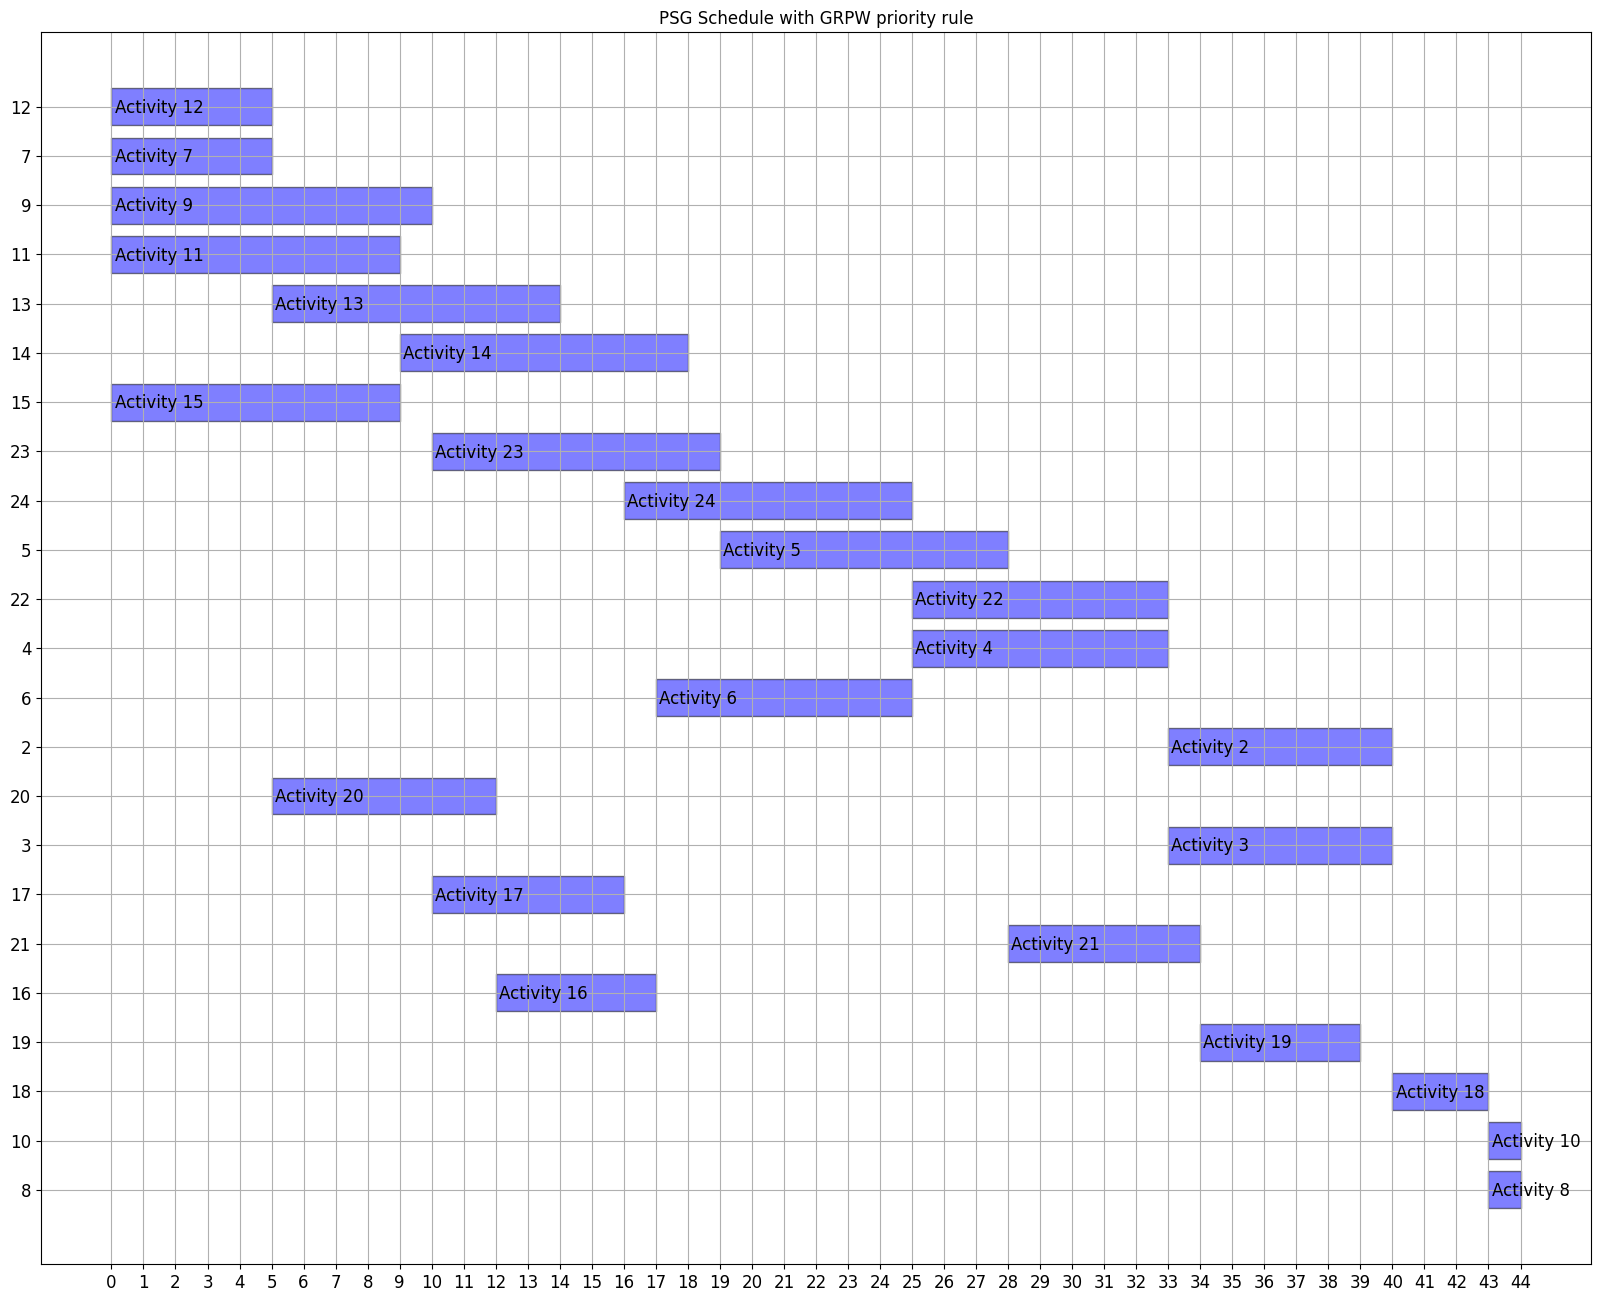

In [ ]:
Gantt(PSG_GRPW,'GRPW','PSG')

# Genetic algorithm

In [ ]:
def create_chromosome(PROJECT):
    c = [x for x in PROJECT] + [1]
    new_schedule = list(np.random.choice(c[1:-2],len(c)-3,replace=False))
    p3 = np.random.choice([1,2],1)[0]
    new_schedule = ['Start'] + new_schedule + ['End'] + [p3]
    return new_schedule

In [ ]:
def initialPopulation(popSize, PROJECT):
    c = [x for x in PROJECT] + [1]
    d = [x for x in PROJECT] + [2]
    population = [c,d]

    for i in range(0, popSize-2):
        population.append(create_chromosome(PROJECT))

    return population

In [ ]:
def is_PL_valid(PL):

  valid = 0
  for n1,n2 in EDGES:

    if PL.index(n1) < PL.index(n2):
      valid +=1

  if valid == len(EDGES):
    return True
  else:
    return False

In [ ]:
df = pd.DataFrame(PROJECT).T
df['index'] = list(range(0,len(df)))
df['index'].astype(str)
df

,duration,precedence,resource_A,resource_B,index
Start,0,[None],0,0,0
2,7,[Start],10,9,1
3,7,[Start],1,11,2
4,8,[Start],0,17,3
5,9,[Start],10,1,4
6,8,[Start],6,8,5
7,5,[Start],2,5,6
8,1,[Start],7,5,7
9,10,[Start],8,3,8
10,1,[Start],8,8,9


In [ ]:
ph = sum(df.duration)
ph

155

In [ ]:
def Fitness(solution):

  schedule_method = solution[-1]
  PL = solution[:-1]

  if is_PL_valid(PL):
    if schedule_method == 1:
      return ph/SSG(PL,PROJECT,max_resources,False)['End']['s']
    else:
      return ph/PSG(PL,PROJECT,max_resources,False)['End']['s']
  else:
    return 1

In [ ]:
def rankSchedules(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i])
    return sorted(fitnessResults.items(),key=lambda item: item[1], reverse = True)

In [ ]:
def selection(popRanked, elite_percentage):

  eliteSize = int(len(popRanked)*elite_percentage)

  selectionResults = []
  df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
  df['cum_sum'] = df.Fitness.cumsum()
  df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()

  for i in range(0, eliteSize):
      selectionResults.append(popRanked[i][0])
  for i in range(0, len(popRanked) - eliteSize):
      pick = 100*np.random.rand()
      for i in range(0, len(popRanked)):
          if pick <= df.iat[i,3]:
              selectionResults.append(popRanked[i][0])
              break
  return selectionResults

In [ ]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [ ]:
def crossover(parent1, parent2):

  m1 = parent1[-1]
  m2 = parent2[-1]
  parent1 = parent1[1:-2]
  parent2 = parent2[1:-2]
  child = []
  childP1 = []
  childP2 = []

  geneA,geneB  = np.random.choice(range(0,len(parent1)),2,replace=False)
  startGene = min(geneA, geneB)
  endGene = max(geneA, geneB)

  #print(startGene,endGene)
  for i in range(startGene, endGene):
      childP1.append(parent1[i])

  childP2 = [item for item in parent2 if item not in childP1]

  child = childP1 + childP2
  if np.random.rand()<=0.5:
    m = m1
  else:
    m = m2

  child = ['Start'] + child + ['End'] + [m]
  return child

In [ ]:
def breedPopulation(matingpool, elite_percentage,crossover_rate ):
  eliteSize = int(len(matingpool)*elite_percentage)
  children = []
  length = len(matingpool) - eliteSize
  pool = random.sample(matingpool, len(matingpool))

  for i in range(0,eliteSize):
      children.append(matingpool[i])

  for i in range(0, length):
      if np.random.rand() <= 0.5:
        child = crossover(pool[i], pool[len(matingpool)-i-1])
      else:
        child = pool[i]
      children.append(child)
  return children

In [ ]:
def mutate(PL,verbose=False):

  li = PL.copy()
  p1,p2 = np.random.choice(range(1,len(li)-2),2,replace=False)
  p3 = np.random.choice([1,2],1)

  li[p1], li[p2] = li[p2], li[p1]

  li[-1] = p3[0]

  if verbose:
    print(f'index {p1} and index {p2} are swapped')
  return li

In [ ]:
def mutatePopulation(population, mutationRate,verbose=False):
  mutatedPop = []

  for ind in range(0, len(population)):
    if np.random.rand() <= mutationRate:
      mutatedInd = mutate(population[ind],verbose)
    else:
      mutatedInd = population[ind]
    mutatedPop.append(mutatedInd)
  return mutatedPop

In [ ]:
def nextGeneration(currentGen, elite_percentage,crossover_rate, mutationRate):

  popRanked = rankSchedules(currentGen)
  selectionResults = selection(popRanked, elite_percentage)
  matingpool = matingPool(currentGen, selectionResults)
  children = breedPopulation(matingpool,elite_percentage,crossover_rate)
  nextGeneration = mutatePopulation(children, mutationRate)
  return nextGeneration

In [ ]:
def geneticAlgorithm(PROJECT, popSize, elite_percentage = 0.2, crossover_rate = 0.2, mutationRate = 0.05, generations = 100,show=False):

  if show:
    iter_list = []
    z_list = []

  pop = initialPopulation(popSize, PROJECT)
  best_schedule = pop[0]
  best_obj = Fitness(best_schedule)

  for i in range(generations):
    pop = nextGeneration(pop, elite_percentage,crossover_rate, mutationRate)
    best_generation = pop[0]
    best_obj_generation = Fitness(best_generation)
    if show:
      print(f'Generation {i}, best solution of generation {best_generation}, obj {int(ph/best_obj_generation)}')
      print('-'*100)
    if best_obj_generation > best_obj:
      best_schedule, best_obj = best_generation, best_obj_generation
    if show:
      iter_list.append(i)
      z_list.append(int(ph/best_obj))

  if show:
    plt.plot(iter_list, z_list)
    plt.xlabel('Generations')
    plt.ylabel('Fitness Value')
    plt.show()

  return best_schedule

Generation 0, best solution of generation ['Start', '15', '23', '19', '20', '6', '13', '12', '24', '18', '8', '10', '11', '9', '3', '2', '5', '7', '21', '16', '17', '14', '4', '22', 'End', 2], obj 44
----------------------------------------------------------------------------------------------------
Generation 1, best solution of generation ['Start', '6', '4', '11', '23', '12', '20', '19', '9', '7', '18', '5', '16', '13', '22', '3', '2', '10', '24', '17', '14', '15', '8', '21', 'End', 2], obj 42
----------------------------------------------------------------------------------------------------
Generation 2, best solution of generation ['Start', '6', '4', '11', '23', '12', '20', '19', '9', '7', '18', '5', '16', '13', '22', '3', '2', '10', '24', '17', '14', '15', '8', '21', 'End', 2], obj 42
----------------------------------------------------------------------------------------------------
Generation 3, best solution of generation ['Start', '6', '4', '11', '23', '12', '20', '19', '9', 

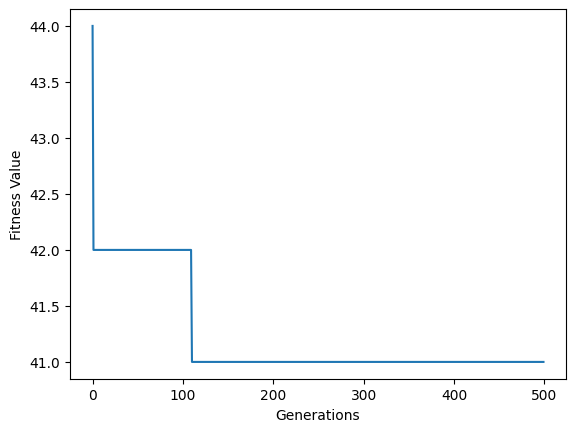

['Start', '18', '15', '21', '6', '24', '3', '20', '8', '23', '19', '10', '5', '7', '16', '11', '4', '12', '9', '14', '2', '22', '17', '13', 'End', 2]
41.0


In [ ]:
solution = geneticAlgorithm(PROJECT, 100, elite_percentage = 0.2, crossover_rate = 0.5, mutationRate = 0.5, generations = 500,show =True)
print(solution)
print(ph/Fitness(solution))

In [ ]:
OUT = PSG(solution[:-1],PROJECT,max_resources,False)
OUT

{'Start': {'s': 0, 'f': 0},
 '18': {'s': 0, 'f': 3},
 '15': {'s': 0, 'f': 9},
 '21': {'s': 3, 'f': 9},
 '6': {'s': 9, 'f': 17},
 '24': {'s': 15, 'f': 24},
 '3': {'s': 8, 'f': 15},
 '20': {'s': 9, 'f': 16},
 '8': {'s': 17, 'f': 18},
 '23': {'s': 12, 'f': 21},
 '19': {'s': 18, 'f': 23},
 '10': {'s': 21, 'f': 22},
 '5': {'s': 3, 'f': 12},
 '7': {'s': 16, 'f': 21},
 '16': {'s': 18, 'f': 23},
 '11': {'s': 22, 'f': 31},
 '4': {'s': 0, 'f': 8},
 '12': {'s': 22, 'f': 27},
 '9': {'s': 23, 'f': 33},
 '14': {'s': 24, 'f': 33},
 '2': {'s': 33, 'f': 40},
 '22': {'s': 33, 'f': 41},
 '17': {'s': 27, 'f': 33},
 '13': {'s': 31, 'f': 40},
 'End': {'s': 41, 'f': 41}}